In [1]:
# %pip install datasets

In [2]:
import time
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy import stats
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import numpy as np
import time
#import plotly.express as px
#!pip install chart_studio
#import chart_studio.tools as tls
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as font_manager
from datetime import datetime
import pytz
from matplotlib.ticker import MaxNLocator
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from matplotlib.gridspec import GridSpec
from datasets import load_dataset
datetime.now(pytz.timezone('US/Pacific')).strftime('%B %d, %Y')
# Configure Notebook
#%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')
# import yfpy
# from yfpy.query import YahooFantasySportsQuery
# import yahoo_oauth
import json
import urllib
#import openpyxl
from sklearn import preprocessing
from datetime import timedelta
#import dataframe_image as dfi
# from google.colab import drive
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

import os
#import praw
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.colors as mcolors
cmap_sum = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#4285f4","#FFFFFF","#F0E442"])
#import pybaseball
import math
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker

colour_palette = ['#FFB000','#648FFF','#785EF0',
                  '#DC267F','#FE6100','#3D1EB2','#894D80','#16AA02','#B5592B','#A3C1ED']
import matplotlib.colors as mcolors
from  matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
import matplotlib.patheffects as path_effects


def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)


    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)


    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)


    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)



    ellipse.set_transform(transf + ax.transData)


    return ax.add_patch(ellipse)




In [3]:

colour_palette = ['#FFB000','#648FFF','#785EF0',
                  '#DC267F','#FE6100','#3D1EB2','#894D80','#16AA02','#B5592B','#A3C1ED']



print('Starting Everything:')
# exit_velo_df = milb_a_ev_df.append([triple_a_ev_df,double_a_ev_df,a_high_a_ev_df,single_a_ev_df]).reset_index(drop=True)
# player_df_all = mlb_a_player_df.append([triple_a_player_df,double_a_player_df,a_high_a_player_df,single_a_player_df]).reset_index(drop=True)
# exit_velo_df = pd.read_csv('exit_velo_df_all.csv',index_col=[0])
# player_df_all = pd.read_csv('player_df_all.csv',index_col=[0])

# pa_df = pd.read_csv('pa_df_all.csv',index_col=[0])
# pa_df_full_na = pa_df.dropna()

### Import Datasets
dataset = load_dataset('nesticot/mlb_data', data_files=['mlb_pitch_data_2023.csv',
                                                         ])
dataset_train = dataset['train']
exit_velo_df = dataset_train.to_pandas().set_index(list(dataset_train.features.keys())[0]).reset_index(drop=True)
#print(df_2023)
#exit_velo_df_mlb['level'] = 'MLB'

# exit_velo_df_copy = exit_velo_df.copy()

# exit_velo_df = exit_velo_df_copy.copy()

end_codes = ['strikeout', 'field_out', 'single', 'walk', 'hit_by_pitch',
       'double', 'sac_fly', 'force_out', 'home_run',
       'grounded_into_double_play', 'fielders_choice', 'field_error',
       'triple', 'sac_bunt', 'double_play', 'intent_walk',
       'fielders_choice_out', 'strikeout_double_play',
       'sac_fly_double_play', 'catcher_interf', 'other_out']



exit_velo_df['pa'] = exit_velo_df.event_type.isin(end_codes)
#exit_velo_df['pa'] = 1
exit_velo_df['k'] = exit_velo_df.event_type.isin(list(filter(None, [x if 'strikeout' in x else '' for x in exit_velo_df.event_type.fillna('None').unique()])))
exit_velo_df['bb'] = exit_velo_df.event_type.isin(list(filter(None, [x if 'walk' in x else '' for x in exit_velo_df.event_type.fillna('None').unique()])))
exit_velo_df['k_minus_bb'] = exit_velo_df['k'].astype(np.float32)-exit_velo_df['bb'].astype(np.float32)

exit_velo_df = exit_velo_df.drop_duplicates(subset=['play_id'])



swing_codes = ['Swinging Strike', 'In play, no out',
        'Foul', 'In play, out(s)',
       'In play, run(s)', 'Swinging Strike (Blocked)',
       'Foul Bunt','Foul Tip', 'Missed Bunt','Foul Pitchout','Swinging Pitchout']

swings_in = ['Swinging Strike', 'In play, no out',
        'Foul', 'In play, out(s)',
       'In play, run(s)', 'Swinging Strike (Blocked)',
       'Foul Bunt','Foul Tip', 'Missed Bunt','Foul Pitchout','Swinging Pitchout']

swing_strike_codes = ['Swinging Strike',
 'Swinging Strike (Blocked)','Missed Bunt','Foul Tip','Swinging Pitchout']


contact_codes = ['In play, no out',
        'Foul', 'In play, out(s)',
       'In play, run(s)',
       'Foul Bunt']

codes_in = ['In play, out(s)',
'Swinging Strike',
'Ball',
'Foul',
'In play, no out',
'Called Strike',
'Foul Tip',
'In play, run(s)',
'Hit By Pitch',
'Ball In Dirt',
'Pitchout',
'Swinging Strike (Blocked)',
'Foul Bunt',
'Missed Bunt',
'Foul Pitchout',
'Intent Ball',
'Swinging Pitchout']

exit_velo_df['in_zone'] = exit_velo_df['zone'] < 10


exit_velo_df = exit_velo_df.drop_duplicates(subset=['play_id'])

exit_velo_df_codes = exit_velo_df[exit_velo_df.play_description.isin(codes_in)].dropna(subset=['in_zone'])

exit_velo_df_codes['bip'] = ~exit_velo_df_codes.launch_speed.isna()
conditions = [
    (exit_velo_df_codes['launch_speed'].isna()),
    (exit_velo_df_codes['launch_speed']*1.5 - exit_velo_df_codes['launch_angle'] >= 117 ) & (exit_velo_df_codes['launch_speed'] + exit_velo_df_codes['launch_angle'] >= 124) & (exit_velo_df_codes['launch_speed'] > 98) & (exit_velo_df_codes['launch_angle'] >= 8) & (exit_velo_df_codes['launch_angle'] <= 50)
]

choices = [False,True]
exit_velo_df_codes['barrel'] = np.select(conditions, choices, default=np.nan)

conditions_ss = [
    (exit_velo_df_codes['launch_angle'].isna()),
    (exit_velo_df_codes['launch_angle'] >= 8 ) * (exit_velo_df_codes['launch_angle'] <= 32 )
]

choices_ss = [False,True]
exit_velo_df_codes['sweet_spot'] = np.select(conditions_ss, choices_ss, default=np.nan)
conditions_hh = [
    (exit_velo_df_codes['launch_speed'].isna()),
    (exit_velo_df_codes['launch_speed'] >= 94.5 )
]

choices_hh = [False,True]
exit_velo_df_codes['hard_hit'] = np.select(conditions_hh, choices_hh, default=np.nan)


conditions_tb = [
    (exit_velo_df_codes['event_type']=='single'),
    (exit_velo_df_codes['event_type']=='double'),
    (exit_velo_df_codes['event_type']=='triple'),
    (exit_velo_df_codes['event_type']=='home_run'),
]

choices_tb = [1,2,3,4]

exit_velo_df_codes['tb'] = np.select(conditions_tb, choices_tb, default=np.nan)

conditions_woba = [
    (exit_velo_df_codes['event_type']=='walk'),
    (exit_velo_df_codes['event_type']=='hit_by_pitch'),
    (exit_velo_df_codes['event_type']=='single'),
    (exit_velo_df_codes['event_type']=='double'),
    (exit_velo_df_codes['event_type']=='triple'),
    (exit_velo_df_codes['event_type']=='home_run'),
]

choices_woba = [0.705,
                0.688,
                0.897,
                1.233,
                1.612,
                2.013]

exit_velo_df_codes['woba'] = np.select(conditions_woba, choices_woba, default=np.nan)


woba_codes = ['strikeout', 'field_out', 'single', 'walk', 'hit_by_pitch',
       'double', 'sac_fly', 'force_out', 'home_run',
       'grounded_into_double_play', 'fielders_choice', 'field_error',
       'triple', 'sac_bunt', 'double_play',
       'fielders_choice_out', 'strikeout_double_play',
       'sac_fly_double_play', 'other_out']





conditions_woba_code = [
    (exit_velo_df_codes['event_type'].isin(woba_codes))
]

choices_woba_code = [1]

exit_velo_df_codes['woba_codes'] = np.select(conditions_woba_code, choices_woba_code, default=np.nan)


#exit_velo_df_codes['barrel']  = (exit_velo_df_codes.launch_speed >= 98) & (exit_velo_df_codes.launch_angle >= (26 - (-98 + exit_velo_df_codes.launch_speed))) & (exit_velo_df_codes.launch_angle <= 30 + (-98 + exit_velo_df_codes.launch_speed)) & (exit_velo_df_codes.launch_angle >= 8) & (exit_velo_df_codes.launch_angle <= 50)



#exit_velo_df_codes['barrel']  = (exit_velo_df_codes.launch_speed >= 98) & (exit_velo_df_codes.launch_angle >= (26 - (-98 + exit_velo_df_codes.launch_speed))) & (exit_velo_df_codes.launch_angle <= 30 + (-98 + exit_velo_df_codes.launch_speed)) & (exit_velo_df_codes.launch_angle >= 8) & (exit_velo_df_codes.launch_angle <= 50)
exit_velo_df_codes['pitches'] = 1
exit_velo_df_codes['whiffs'] = [1 if ((x == 'S')|(x == 'W')|(x =='T')) else 0 for x in exit_velo_df_codes.play_code]
exit_velo_df_codes['csw'] = [1 if ((x == 'S')|(x == 'W')|(x =='T')|(x == 'C')) else 0 for x in exit_velo_df_codes.play_code]
exit_velo_df_codes['swings'] = [1 if x in swings_in else 0 for x in exit_velo_df_codes.play_description]

exit_velo_df_codes['out_zone'] = exit_velo_df_codes.in_zone == False
exit_velo_df_codes['zone_swing'] = (exit_velo_df_codes.in_zone == True)&(exit_velo_df_codes.swings == 1)
exit_velo_df_codes['zone_contact'] = (exit_velo_df_codes.in_zone == True)&(exit_velo_df_codes.swings == 1)&(exit_velo_df_codes.whiffs == 0)
exit_velo_df_codes['ozone_swing'] = (exit_velo_df_codes.in_zone==False)&(exit_velo_df_codes.swings == 1)
exit_velo_df_codes['ozone_contact'] = (exit_velo_df_codes.in_zone==False)&(exit_velo_df_codes.swings == 1)&(exit_velo_df_codes.whiffs == 0)

Starting Everything:


Found cached dataset csv (C:/Users/thoma/.cache/huggingface/datasets/nesticot___csv/nesticot--mlb_data-61759989b5026344/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)
100%|██████████| 1/1 [00:00<00:00,  1.01it/s]


In [4]:
test_df = exit_velo_df_codes.sort_values(by='pitcher_name').drop_duplicates(subset='pitcher_name').reset_index(drop=True)[['pitcher_id','pitcher_name']]#['pitcher'].to_dict()
test_df = test_df.set_index('pitcher_id')

In [5]:
exit_velo_df_codes[exit_velo_df_codes['pitcher_name']=='Eury Perez'].groupby('pitch_type')['ivb'].mean()

pitch_type
CH    10.448667
CU     0.679907
FF    18.117217
SL     6.053277
Name: ivb, dtype: float64

In [6]:

pitcher_dict = test_df['pitcher_name'].to_dict()

exit_velo_df_codes['game_opp'] = exit_velo_df_codes['game_date'].astype(str) + ' vs ' + exit_velo_df_codes['batter_team'].astype(str)
print(exit_velo_df_codes['game_opp'])

date_dict = pd.concat([pd.DataFrame(data={'game_id':0,'game_opp':'Season'},index=[0]),
                exit_velo_df_codes.drop_duplicates(subset=['pitcher_id','game_id','game_opp'])[['game_id','game_opp']]]).set_index('game_id').to_dict()

chadwick_df_small = pd.read_csv('chadwick_df.csv')

exit_velo_df_codes = exit_velo_df_codes.merge(right=chadwick_df_small[['key_mlbam','key_fangraphs']],left_on = 'pitcher_id',right_on='key_mlbam',how='left')

0         2023-03-30 vs ATL
1         2023-03-30 vs ATL
2         2023-03-30 vs ATL
3         2023-03-30 vs ATL
4         2023-03-30 vs ATL
                ...        
718480    2023-10-01 vs CIN
718481    2023-10-01 vs CIN
718482    2023-10-01 vs CIN
718483    2023-10-01 vs CIN
718484    2023-10-01 vs CIN
Name: game_opp, Length: 717945, dtype: object


In [7]:
exit_velo_df_codes.game_date = pd.to_datetime(exit_velo_df_codes.game_date).dt.date
exit_velo_df_codes['pitch'] = 1

In [8]:
exit_velo_df_codes.columns

Index(['game_id', 'game_date', 'batter_id', 'batter_name', 'batter_hand',
       'batter_team', 'batter_team_id', 'pitcher_id', 'pitcher_name',
       'pitcher_hand', 'pitcher_team', 'pitcher_team_id', 'play_description',
       'play_code', 'in_play', 'is_strike', 'is_swing', 'is_whiff', 'is_out',
       'is_ball', 'is_review', 'pitch_type', 'pitch_description', 'strikes',
       'balls', 'outs', 'start_speed', 'end_speed', 'sz_top', 'sz_bot', 'x',
       'y', 'ax', 'ay', 'az', 'pfxx', 'pfxz', 'px', 'pz', 'vx0', 'vy0', 'vz0',
       'x0', 'y0', 'z0', 'zone', 'type_confidence', 'plate_time', 'extension',
       'spin_rate', 'spin_direction', 'ivb', 'hb', 'launch_speed',
       'launch_angle', 'launch_distance', 'launch_location', 'trajectory',
       'hardness', 'hit_x', 'hit_y', 'index_play', 'play_id', 'start_time',
       'end_time', 'is_pitch', 'type_type', 'type_ab', 'event', 'event_type',
       'rbi', 'away_score', 'home_score', 'pa', 'k', 'bb', 'k_minus_bb',
       'in_zone', '

In [9]:
statcast_df_df_pitch = exit_velo_df_codes[exit_velo_df_codes['pitch']==1].groupby(['pitch_description']).agg(
    pitches = ('pitch','sum'),
    swings = ('swings','sum'),
    whiff = ('whiffs','sum'),
    csw = ('csw','sum'),
    out_zone = ('out_zone','sum'),
    chase = ('ozone_swing','sum'),
    pitch_velocity = ('start_speed','mean'),
    spin_rate = ('spin_rate','mean'),
    exit_velocity = ('launch_speed','mean'),
    pitch_velocity_std = ('start_speed','std'),
    spin_rate_std = ('spin_rate','std'),
    exit_velocity_std = ('launch_speed','std'),


    pfx_x = ('pfxx','mean'),
    pfx_z = ('pfxz','mean'),
    extension = ('extension','mean'),
    release_x = ('x0','mean'),
    release_z = ('z0','mean'),
    zone_percent = ('in_zone','mean') ,
    wOBA = ('woba','mean')

    #pitch_velocity = ('pitch_velocity','mean'),
    # pitch_velocity =  ('launch_speed',percentile(95)),
    # launch_speed = ('launch_speed','mean'),
    # launch_angle = ('launch_angle','mean'),
).sort_values(by='pitches',ascending=False).reset_index()

In [10]:
statcast_df_df_pitch.columns

Index(['pitch_description', 'pitches', 'swings', 'whiff', 'csw', 'out_zone',
       'chase', 'pitch_velocity', 'spin_rate', 'exit_velocity',
       'pitch_velocity_std', 'spin_rate_std', 'exit_velocity_std', 'pfx_x',
       'pfx_z', 'extension', 'release_x', 'release_z', 'zone_percent', 'wOBA'],
      dtype='object')

In [11]:

pitches_all_df = exit_velo_df_codes[exit_velo_df_codes['pitch']==1].groupby('pitch').agg(
    pitches = ('pitch','sum'),
    swings = ('swings','sum'),
    whiff = ('whiffs','sum'),
    csw = ('csw','sum'),
    out_zone = ('out_zone','sum'),
    chase = ('ozone_swing','sum'),
    pitch_velocity = ('start_speed','mean'),
    spin_rate = ('spin_rate','mean'),
    exit_velocity = ('launch_speed','mean'),
    pitch_velocity_std = ('start_speed','std'),
    spin_rate_std = ('spin_rate','std'),
    exit_velocity_std = ('launch_speed','std'),


    pfx_x = ('pfxx','mean'),
    pfx_z = ('pfxz','mean'),
    extension = ('extension','mean'),
    release_x = ('x0','mean'),
    release_z = ('z0','mean'),
    zone_percent = ('in_zone','mean') ,
    wOBA = ('woba','mean')

    #pitch_velocity = ('pitch_velocity','mean'),
    # pitch_velocity =  ('launch_speed',percentile(95)),
    # launch_speed = ('launch_speed','mean'),
    # launch_angle = ('launch_angle','mean'),
).sort_values(by='pitches',ascending=False).reset_index()

pitches_all_df['pitch_description'] = 'All'

statcast_df_df_pitch = pd.concat([statcast_df_df_pitch,pitches_all_df]).reset_index(drop=True)

statcast_df_df_pitch['whiff_rate'] = statcast_df_df_pitch['whiff']/statcast_df_df_pitch['swings']
statcast_df_df_pitch['csw_rate'] = statcast_df_df_pitch['csw']/statcast_df_df_pitch['pitches']
statcast_df_df_pitch['chase_percent'] = statcast_df_df_pitch['chase']/statcast_df_df_pitch['out_zone']
statcast_df_df_pitch['pitch_percent'] = statcast_df_df_pitch['pitches']/statcast_df_df_pitch['pitches'].sum()



exit_velo_df_codes = exit_velo_df_codes.merge(statcast_df_df_pitch[['pitch_description','whiff_rate','csw_rate','wOBA']],left_on='pitch_description',right_on='pitch_description')
exit_velo_df_codes = exit_velo_df_codes.rename(columns={'whiff_rate':'whiff_rate_league','csw_rate':'csw_rate_league'})

exit_velo_df_codes['whiff_rate_diff'] = exit_velo_df_codes.whiffs - exit_velo_df_codes.whiff_rate_league
exit_velo_df_codes['csw_rate_diff'] = exit_velo_df_codes.csw - exit_velo_df_codes.csw_rate_league
exit_velo_df_codes['xwobacon_diff'] = exit_velo_df_codes.wOBA - exit_velo_df_codes.wOBA

exit_velo_df_codes['whiff_rate_diff_100'] = (exit_velo_df_codes.whiffs/exit_velo_df_codes.whiff_rate_league)*100
exit_velo_df_codes['csw_rate_diff_100']  = (exit_velo_df_codes.csw/exit_velo_df_codes.csw_rate_league)*100
exit_velo_df_codes['xwobacon_diff_100'] = (exit_velo_df_codes.wOBA/exit_velo_df_codes.wOBA)*100

print('all df')
print(statcast_df_df_pitch)

all df
     pitch_description  pitches  swings  whiff     csw  out_zone   chase  \
0   Four-Seam Fastball   230964  111297  24710   64951    105142   25573   
1               Slider   126080   60686  20416   39081     69420   21994   
2               Sinker   110890   50199   7185   31467     49457   12491   
3             Changeup    78501   39508  12279   19893     47870   16184   
4               Cutter    55802   27663   6695   15664     27194    7772   
5            Curveball    51673   21550   6681   16128     29170    8307   
6              Sweeper    30959   14382   4702    9457     17479    5499   
7             Splitter    15569    8129   2825    3994      9880    3587   
8        Knuckle Curve    12153    5439   1800    3747      7058    2292   
9               Slurve     2330     984    273     767      1262     365   
10            Fastball     1140     573     41     200       597     168   
11            Forkball      778     358    199     247       590     214   
12   

In [12]:
headers = {'User-agent': 'your bot 0.1'}

fangraphs_table = 7

In [13]:
  # input_id = input.id()
  # input_date_range_id = input.date_range_id()
  input_id = 691587
  # input_date_id = input.date_id()
  input_date_id = 718212
  input_date_range_id = '0'
  eury_df = exit_velo_df_codes[exit_velo_df_codes['pitcher_id'].astype(int) == int(input_id)].sort_values(by=['game_date','play_id'])
  #print(input.id())
  print(input_date_range_id == '0')
  print(len(eury_df))
  #print(str(input_date_id[0]))



  if input_date_id == '0':
      if input_date_range_id[0] == exit_velo_df_codes.game_date.min() and input_date_range_id[1] == exit_velo_df_codes.game_date.max():
          data_df = eury_df.copy()
          data_df = data_df.reset_index(drop=True)
          data_df = data_df.dropna(subset=['pitch_name'])
      else:
          data_df = eury_df[(eury_df.game_date >= input_date_range_id[0]) & (eury_df.game_date <= input_date_range_id[1])].reset_index(drop=True)
          data_df = data_df.reset_index(drop=True)
          data_df = data_df.dropna(subset=['pitch_name'])

  else:
      data_df = eury_df[eury_df['game_id'] == int(input_date_id)].reset_index(drop=True)
      data_df = data_df.dropna(subset=['pitch_type'])



  if len(data_df) < 1:
      fig, ax = plt.subplots(1, 1, figsize=(16, 16))
      ax.text(x=0.5,y=0.5,s='Plot Is Generating',fontsize=32,ha='center')
      ###return #

  # if input.radio_id() != 'a':
  #     data_df = data_df[data_df['batter_hand'] ==  input.radio_id()]



  # if input.home_id() != 'all':
  #     data_df = data_df[data_df.home_away ==  input.home_id()]

  #data_df = data_df.reset_index(drop=True)
  print('NOWWWW')
  print(type(eury_df['game_id'].reset_index(drop=True)[0]))
  print(type(input_date_id))

  #time.sleep(5)
  if input_date_id != '0':
      time.sleep(5)
      # stuff_plus_full_df_cut = stuff_plus_full_df[pd.to_datetime(stuff_plus_full_df.date).dt.date == pd.to_datetime(data_df.game_date)[0]]
      # loc_plus_full_df_cut = loc_plus_full_df[pd.to_datetime(loc_plus_full_df.date).dt.date == pd.to_datetime(data_df.game_date)[0]]
      # pitching_plus_full_df_cut = pitching_plus_full_df[pd.to_datetime(pitching_plus_full_df.date).dt.date == pd.to_datetime(data_df.game_date)[0]]
      print('Game Log')
      try:
          url = f'https://www.fangraphs.com/leaders-legacy.aspx?pos=all&stats=pit&lg=all&type=36&season=2023&month=1000&season1=2023&ind=0&startdate={str(data_df.game_date[0])}&enddate={str(data_df.game_date[0])}&team=0&qual=0&pagenum=1&pageitems=5000&page=1_5000'
          data = requests.get(url, headers = {'User-agent': 'your bot 0.1'}).text
          soup = BeautifulSoup(data, 'html.parser')

          stuff_df = pd.read_html(data)[fangraphs_table]#.droplevel(1)
          stuff_df.columns = stuff_df.columns.droplevel(0)
          stuff_df = stuff_df.iloc[:-1]
          stuff_df = stuff_df[stuff_df.columns[1:]]
          stuff_df.columns = [x.replace('Stf+ ','') for x in stuff_df.columns]
          stuff_df = stuff_df.rename(columns = {'FA':'FF'})
          stuff_df['ST'] = stuff_df.SL
          stuff_df['SV'] = stuff_df.CU

  # except (KeyError, requests.exceptions.HTTPError) as e:
      # fig, ax = plt.subplots(1, 1, figsize=(16, 16))
      # ax.text(x=0.5,y=0.5,s='Plot Is Generating',fontsize=32,ha='center')
      # return




          tables = soup.find_all('table')

          #  Looking for the table with the classes 'wikitable' and 'sortable'
          table = soup.find('table', class_='rgMasterTable')

          import re
          stuff_df['fg_id'] = [re.findall(r'\d+', x[:10])[0] for x in str(table).split('playerid=')[1:]]

          stuff_plus_full_df_cut = stuff_df.melt(id_vars=['fg_id','Name','Team','IP']).dropna().sort_values(by='IP',ascending=False).reset_index(drop=True)
          stuff_plus_full_df_cut.fg_id = stuff_plus_full_df_cut.fg_id.astype(int)

      except (KeyError, requests.exceptions.HTTPError,ValueError,requests.exceptions.RequestException,urllib.error.HTTPError) as e:
          stuff_plus_full_df_cut = pd.DataFrame()
      # except:
      #      print('lol')
      time.sleep(5)
      try:
          url = f'https://www.fangraphs.com/leaders-legacy.aspx?pos=all&stats=pit&lg=all&type=37&season=2023&month=1000&season1=2023&ind=0&startdate={str(data_df.game_date[0])}&enddate={str(data_df.game_date[0])}&team=0&qual=0&pagenum=1&pageitems=5000&page=1_5000'
          data = requests.get(url,headers=headers).text
          soup = BeautifulSoup(data, 'html.parser')

          loc_df = pd.read_html(data)[fangraphs_table]#.droplevel(1)
          loc_df.columns = loc_df.columns.droplevel(0)
          loc_df = loc_df.iloc[:-1]
          loc_df = loc_df[loc_df.columns[1:]]
          loc_df.columns = [x.replace('Loc+ ','') for x in loc_df.columns]
          loc_df = loc_df.rename(columns = {'FA':'FF'})
          loc_df['ST'] = loc_df.SL
          loc_df['SV'] = loc_df.CU





          tables = soup.find_all('table')

          #  Looking for the table with the classes 'wikitable' and 'sortable'
          table = soup.find('table', class_='rgMasterTable')

          import re
          loc_df['fg_id'] = [re.findall(r'\d+', x[:10])[0] for x in str(table).split('playerid=')[1:]]

          loc_plus_full_df_cut = loc_df.melt(id_vars=['fg_id','Name','Team','IP']).dropna().sort_values(by='IP',ascending=False).reset_index(drop=True)
          loc_plus_full_df_cut.fg_id = loc_plus_full_df_cut.fg_id.astype(int)
      except (KeyError, requests.exceptions.HTTPError,ValueError,requests.exceptions.RequestException,urllib.error.HTTPError) as e:
          loc_plus_full_df_cut = pd.DataFrame()
      time.sleep(5)
      try:

          url = f'https://www.fangraphs.com/leaders-legacy.aspx?pos=all&stats=pit&lg=all&type=38&season=2023&month=1000&season1=2023&ind=0&startdate={str(data_df.game_date[0])}&enddate={str(data_df.game_date[0])}&team=0&qual=0&pagenum=1&pageitems=5000&page=1_5000'
          data = requests.get(url,headers=headers).text
          soup = BeautifulSoup(data, 'html.parser')

          pitching_df = pd.read_html(data)[fangraphs_table]#.droplevel(1)
          pitching_df.columns = pitching_df.columns.droplevel(0)
          pitching_df = pitching_df.iloc[:-1]
          pitching_df = pitching_df[pitching_df.columns[1:]]
          pitching_df.columns = [x.replace('Pit+ ','') for x in pitching_df.columns]
          pitching_df = pitching_df.rename(columns = {'FA':'FF'})
          pitching_df['ST'] = pitching_df.SL
          pitching_df['SV'] = pitching_df.CU





          tables = soup.find_all('table')

          #  Looking for the table with the classes 'wikitable' and 'sortable'
          table = soup.find('table', class_='rgMasterTable')

          import re
          pitching_df['fg_id'] = [re.findall(r'\d+', x[:10])[0] for x in str(table).split('playerid=')[1:]]

          pitching_plus_full_df_cut = pitching_df.melt(id_vars=['fg_id','Name','Team','IP']).dropna().sort_values(by='IP',ascending=False).reset_index(drop=True)
          pitching_plus_full_df_cut.fg_id = pitching_plus_full_df_cut.fg_id.astype(int)
      except (KeyError, requests.exceptions.HTTPError,ValueError,requests.exceptions.RequestException,urllib.error.HTTPError) as e:
          pitching_plus_full_df_cut = pd.DataFrame()

  else:
      if input_date_range_id[0] <= exit_velo_df_codes.game_date.min() and input_date_range_id[1] >= exit_velo_df_codes.game_date.max():
          #time.sleep(5)
          # stuff_plus_full_df_cut = stuff_plus_season_df.copy()
          # loc_plus_full_df_cut = loc_plus_season_df.copy()
          # pitching_plus_full_df_cut = pitching_plus_season_df.copy()
          print('Running')
          try:

              url = f'https://www.fangraphs.com/leaders-legacy.aspx?pos=all&stats=pit&lg=all&qual=0&type=36&season=2023&month=0&season1=2023&ind=0&team=0&rost=0&age=0&filter=&players=0&startdate=2023-03-30&enddate=2023-12-31&page=1_5000'
              data = requests.get(url,headers=headers).text
              soup = BeautifulSoup(data, 'html.parser')

              stuff_df = pd.read_html(data)[fangraphs_table]#.droplevel(1)
              stuff_df.columns = stuff_df.columns.droplevel(0)
              stuff_df = stuff_df.iloc[:-1]
              stuff_df = stuff_df[stuff_df.columns[1:]]
              stuff_df.columns = [x.replace('Stf+ ','') for x in stuff_df.columns]
              stuff_df = stuff_df.rename(columns = {'FA':'FF'})
              stuff_df['ST'] = stuff_df.SL
              stuff_df['SV'] = stuff_df.CU




              tables = soup.find_all('table')

              #  Looking for the table with the classes 'wikitable' and 'sortable'
              table = soup.find('table', class_='rgMasterTable')

              import re
              stuff_df['fg_id'] = [re.findall(r'\d+', x[:10])[0] for x in str(table).split('playerid=')[1:]]

              stuff_plus_full_df_cut = stuff_df.melt(id_vars=['fg_id','Name','Team','IP']).dropna().sort_values(by='IP',ascending=False).reset_index(drop=True)
              stuff_plus_full_df_cut.fg_id = stuff_plus_full_df_cut.fg_id.astype(int)

          except (KeyError, requests.exceptions.HTTPError,ValueError,requests.exceptions.RequestException,urllib.error.HTTPError) as e:
              stuff_plus_full_df_cut = pd.DataFrame()


          try:
              #time.sleep(5)
              url = f'https://www.fangraphs.com/leaders-legacy.aspx?pos=all&stats=pit&lg=all&qual=0&type=37&season=2023&month=0&season1=2023&ind=0&team=0&rost=0&age=0&filter=&players=0&startdate=2023-03-30&enddate=2023-12-31&page=1_5000'
              data = requests.get(url,headers=headers).text
              soup = BeautifulSoup(data, 'html.parser')

              loc_df = pd.read_html(data)[fangraphs_table]#.droplevel(1)
              loc_df.columns = loc_df.columns.droplevel(0)
              loc_df = loc_df.iloc[:-1]
              loc_df = loc_df[loc_df.columns[1:]]
              loc_df.columns = [x.replace('Loc+ ','') for x in loc_df.columns]
              loc_df = loc_df.rename(columns = {'FA':'FF'})
              loc_df['ST'] = loc_df.SL
              loc_df['SV'] = loc_df.CU





              tables = soup.find_all('table')

              #  Looking for the table with the classes 'wikitable' and 'sortable'
              table = soup.find('table', class_='rgMasterTable')

              import re
              loc_df['fg_id'] = [re.findall(r'\d+', x[:10])[0] for x in str(table).split('playerid=')[1:]]

              loc_plus_full_df_cut = loc_df.melt(id_vars=['fg_id','Name','Team','IP']).dropna().sort_values(by='IP',ascending=False).reset_index(drop=True)
              loc_plus_full_df_cut.fg_id = loc_plus_full_df_cut.fg_id.astype(int)
          except (KeyError, requests.exceptions.HTTPError,ValueError,requests.exceptions.RequestException,urllib.error.HTTPError) as e:
              loc_plus_full_df_cut = pd.DataFrame()

          try:
              #time.sleep(5)
              url = f'https://www.fangraphs.com/leaders-legacy.aspx?pos=all&stats=pit&lg=all&qual=0&type=38&season=2023&month=0&season1=2023&ind=0&team=0&rost=0&age=0&filter=&players=0&startdate=2023-03-30&enddate=2023-12-31&page=1_5000'
              data = requests.get(url,headers=headers).text
              soup = BeautifulSoup(data, 'html.parser')

              pitching_df = pd.read_html(data)[fangraphs_table]#.droplevel(1)
              pitching_df.columns = pitching_df.columns.droplevel(0)
              pitching_df = pitching_df.iloc[:-1]
              pitching_df = pitching_df[pitching_df.columns[1:]]
              pitching_df.columns = [x.replace('Pit+ ','') for x in pitching_df.columns]
              pitching_df = pitching_df.rename(columns = {'FA':'FF'})
              pitching_df['ST'] = pitching_df.SL
              pitching_df['SV'] = pitching_df.CU




              tables = soup.find_all('table')

              #  Looking for the table with the classes 'wikitable' and 'sortable'
              table = soup.find('table', class_='rgMasterTable')

              import re
              pitching_df['fg_id'] = [re.findall(r'\d+', x[:10])[0] for x in str(table).split('playerid=')[1:]]

              pitching_plus_full_df_cut = pitching_df.melt(id_vars=['fg_id','Name','Team','IP']).dropna().sort_values(by='IP',ascending=False).reset_index(drop=True)
              pitching_plus_full_df_cut.fg_id = pitching_plus_full_df_cut.fg_id.astype(int)
          except (KeyError, requests.exceptions.HTTPError,ValueError,requests.exceptions.RequestException,urllib.error.HTTPError) as e:
              pitching_plus_full_df_cut = pd.DataFrame()

      else:
          print('Running')
          try:
              #time.sleep(5)
              url = f'https://www.fangraphs.com/leaders-legacy.aspx?pos=all&stats=pit&lg=all&type=36&season=2023&month=1000&season1=2023&ind=0&startdate={str(input.date_range_id()[0])}&enddate={str(input.date_range_id()[1])}&team=0&qual=0&pagenum=1&pageitems=5000&page=1_5000'
              print(url)
              data = requests.get(url,headers=headers).text

              stuff_df = pd.read_html(data)[fangraphs_table]#.droplevel(1)
              stuff_df.columns = stuff_df.columns.droplevel(0)
              stuff_df = stuff_df.iloc[:-1]
              stuff_df = stuff_df[stuff_df.columns[1:]]
              stuff_df.columns = [x.replace('Stf+ ','') for x in stuff_df.columns]
              stuff_df = stuff_df.rename(columns = {'FA':'FF'})
              stuff_df['ST'] = stuff_df.SL
              stuff_df['SV'] = stuff_df.CU
              stuff_df = stuff_df[stuff_df.Name!='No records to display.']



              soup = BeautifulSoup(data, 'html.parser')

              tables = soup.find_all('table')

              #  Looking for the table with the classes 'wikitable' and 'sortable'
              table = soup.find('table', class_='rgMasterTable')

              import re
              stuff_df['fg_id'] = [re.findall(r'\d+', x[:10])[0] for x in str(table).split('playerid=')[1:]]

              stuff_plus_full_df_cut = stuff_df.melt(id_vars=['fg_id','Name','Team','IP']).dropna().sort_values(by='IP',ascending=False).reset_index(drop=True)
              stuff_plus_full_df_cut.fg_id = stuff_plus_full_df_cut.fg_id.astype(int)

          except (KeyError, requests.exceptions.HTTPError,ValueError,requests.exceptions.RequestException,urllib.error.HTTPError) as e:
              stuff_plus_full_df_cut = pd.DataFrame()



          try:
              #time.sleep(5)
              url = f'https://www.fangraphs.com/leaders-legacy.aspx?pos=all&stats=pit&lg=all&type=37&season=2023&month=1000&season1=2023&ind=0&startdate={str(input.date_range_id()[0])}&enddate={str(input.date_range_id()[1])}&team=0&qual=0&pagenum=1&pageitems=5000&page=1_5000'
              data = requests.get(url,headers=headers).text
              soup = BeautifulSoup(data, 'html.parser')

              loc_df = pd.read_html(data)[fangraphs_table]#.droplevel(1)
              loc_df.columns = loc_df.columns.droplevel(0)
              loc_df = loc_df.iloc[:-1]
              loc_df = loc_df[loc_df.columns[1:]]
              loc_df.columns = [x.replace('Loc+ ','') for x in loc_df.columns]
              loc_df = loc_df.rename(columns = {'FA':'FF'})
              loc_df['ST'] = loc_df.SL
              loc_df['SV'] = loc_df.CU
              loc_df = loc_df[loc_df.Name!='No records to display.']



              # url = f'https://www.fangraphs.com/leaders-legacy.aspx?pos=all&stats=pit&lg=all&type=37&season=2023&month=1000&season1=2023&ind=0&startdate={str(input.date_range_id()[0])}&enddate={str(input.date_range_id()[1])}&team=0&qual=0&pagenum=1&pageitems=5000&page=1_5000'
              # data = requests.get(url).text
              # soup = BeautifulSoup(data, 'html.parser')

              tables = soup.find_all('table')

              #  Looking for the table with the classes 'wikitable' and 'sortable'
              table = soup.find('table', class_='rgMasterTable')

              import re
              loc_df['fg_id'] = [re.findall(r'\d+', x[:10])[0] for x in str(table).split('playerid=')[1:]]

              loc_plus_full_df_cut = loc_df.melt(id_vars=['fg_id','Name','Team','IP']).dropna().sort_values(by='IP',ascending=False).reset_index(drop=True)
              loc_plus_full_df_cut.fg_id = loc_plus_full_df_cut.fg_id.astype(int)
          except (KeyError, requests.exceptions.HTTPError,ValueError,requests.exceptions.RequestException,urllib.error.HTTPError) as e:
              loc_plus_full_df_cut = pd.DataFrame()

          try:
              #time.sleep(5)
              url = f'https://www.fangraphs.com/leaders-legacy.aspx?pos=all&stats=pit&lg=all&type=38&season=2023&month=1000&season1=2023&ind=0&startdate={str(input.date_range_id()[0])}&enddate={str(input.date_range_id()[1])}&team=0&qual=0&pagenum=1&pageitems=5000&page=1_5000'
              data = requests.get(url,headers=headers).text
              soup = BeautifulSoup(data, 'html.parser')

              pitching_df = pd.read_html(data)[fangraphs_table]#.droplevel(1)
              pitching_df.columns = pitching_df.columns.droplevel(0)
              pitching_df = pitching_df.iloc[:-1]
              pitching_df = pitching_df[pitching_df.columns[1:]]
              pitching_df.columns = [x.replace('Pit+ ','') for x in pitching_df.columns]
              pitching_df = pitching_df.rename(columns = {'FA':'FF'})
              pitching_df['ST'] = pitching_df.SL
              pitching_df['SV'] = pitching_df.CU
              pitching_df = pitching_df[pitching_df.Name!='No records to display.']




              tables = soup.find_all('table')

              #  Looking for the table with the classes 'wikitable' and 'sortable'
              table = soup.find('table', class_='rgMasterTable')

              import re
              pitching_df['fg_id'] = [re.findall(r'\d+', x[:10])[0] for x in str(table).split('playerid=')[1:]]

              pitching_plus_full_df_cut = pitching_df.melt(id_vars=['fg_id','Name','Team','IP']).dropna().sort_values(by='IP',ascending=False).reset_index(drop=True)
              pitching_plus_full_df_cut.fg_id = pitching_plus_full_df_cut.fg_id.astype(int)
          except (KeyError, requests.exceptions.HTTPError,ValueError,requests.exceptions.RequestException,urllib.error.HTTPError) as e:
              pitching_plus_full_df_cut = pd.DataFrame()
  if len(stuff_plus_full_df_cut) < 1:
      stuff_plus_full_df_cut = pd.DataFrame(columns=['fg_id', 'Name', 'Team', 'IP', 'variable', 'value'])
  if len(loc_plus_full_df_cut) < 1:
      loc_plus_full_df_cut = pd.DataFrame(columns=['fg_id', 'Name', 'Team', 'IP', 'variable', 'value'])
  if len(pitching_plus_full_df_cut) < 1:
      pitching_plus_full_df_cut = pd.DataFrame(columns=['fg_id', 'Name', 'Team', 'IP', 'variable', 'value'])

  print(stuff_plus_full_df_cut)
  data_df = data_df.merge(right=stuff_plus_full_df_cut,left_on=['key_fangraphs','pitch_type'],right_on=['fg_id','variable'],how='left')
  data_df = data_df.merge(right=loc_plus_full_df_cut,left_on=['key_fangraphs','pitch_type'],right_on=['fg_id','variable'],how='left',suffixes=['','_loc'])
  data_df = data_df.merge(right=pitching_plus_full_df_cut,left_on=['key_fangraphs','pitch_type'],right_on=['fg_id','variable'],how='left',suffixes=['','_pitching'])




  data_df['prop'] = data_df.groupby("pitch_description")["pitch"].transform("sum")


  data_df = data_df.sort_values(by=['prop','value','pitch_description'],ascending=[False,False,True])

True
1534
NOWWWW
<class 'numpy.int64'>
<class 'int'>
Game Log
     fg_id           Name Team   IP variable value
0    12304  Chris Bassitt  TOR  9.0       SL   205
1    12304  Chris Bassitt  TOR  9.0       CH    79
2    12304  Chris Bassitt  TOR  9.0       CU   126
3    12304  Chris Bassitt  TOR  9.0       ST   205
4    12304  Chris Bassitt  TOR  9.0       FC   114
..     ...            ...  ...  ...      ...   ...
971  15047    Austin Voth  BAL  0.0       CU    92
972  15047    Austin Voth  BAL  0.0       FF    95
973   3096  Kenley Jansen  BOS  0.0   Stuff+   123
974   3096  Kenley Jansen  BOS  0.0       ST    78
975  15047    Austin Voth  BAL  0.0   Stuff+    93

[976 rows x 6 columns]


In [14]:
data_df

game_id   game_date  batter_id       batter_name batter_hand batter_team  \
2    718212  2023-05-12     592656       Henry Ramos           L         CIN   
3    718212  2023-05-12     676480      Jose Barrero           R         CIN   
8    718212  2023-05-12     663886  Tyler Stephenson           R         CIN   
9    718212  2023-05-12     641584       Jake Fraley           L         CIN   
10   718212  2023-05-12     656413  Stuart Fairchild           R         CIN   
..      ...         ...        ...               ...         ...         ...   
86   718212  2023-05-12     669222       Nick Senzel           R         CIN   
18   718212  2023-05-12     641584       Jake Fraley           L         CIN   
50   718212  2023-05-12     641584       Jake Fraley           L         CIN   
80   718212  2023-05-12     592656       Henry Ramos           L         CIN   
85   718212  2023-05-12     641584       Jake Fraley           L         CIN   

    batter_team_id  pitcher_id pitcher_name pitcher_hand  ... IP_loc  \
2              113      691587   Eury Perez            R  ...    4.2   
3              113      691587   Eury Perez            R  ...    4.2   
8              113      691587   Eury Perez            R  ...    4.2   
9              113      691587   Eury Perez            R  ...    4.2   
10             113      691587   Eury Perez            R  ...    4.2   
..             ...         ...          ...          ...  ...    ...   
86             113      691587   Eury Perez            R  ...    4.2   
18             113      691587   Eury Perez            R  ...    4.2   
50             113      691587   Eury Perez            R  ...    4.2   
80             113      691587   Eury Perez            R  ...    4.2   
85             113      691587   Eury Perez            R  ...    4.2   

    variable_loc value_loc fg_id_pitching Name_pitching Team_pitching  \
2             FF       111          27768    Eury Perez           MIA   
3             FF       111          27768    Eury Perez           MIA   
8             FF       111          27768    Eury Perez           MIA   
9             FF       111          27768    Eury Perez           MIA   
10            FF       111          27768    Eury Perez           MIA   
..           ...       ...            ...           ...           ...   
86            CU        92          27768    Eury Perez           MIA   
18            CH        89          27768    Eury Perez           MIA   
50            CH        89          27768    Eury Perez           MIA   
80            CH        89          27768    Eury Perez           MIA   
85            CH        89          27768    Eury Perez           MIA   

   IP_pitching variable_pitching value_pitching prop  
2          4.2                FF            118   41  
3          4.2                FF            118   41  
8          4.2                FF            118   41  
9          4.2                FF            118   41  
10         4.2                FF            118   41  
..         ...               ...            ...  ...  
86         4.2                CU            111   12  
18         4.2                CH             82    4  
50         4.2                CH             82    4  
80         4.2                CH             82    4  
85         4.2                CH             82    4  

[88 rows x 126 columns]

In [15]:
data_df_copy = data_df.copy()

In [16]:
data_df = data_df_copy.copy()

In [56]:
f"https://statsapi.mlb.com/api/v1/people?personIds={str((int(data_df['pitcher_id'].reset_index(drop=True)[0])))}&appContext=majorLeague&"+\
                                "hydrate=currentTeam,"+\
                                "stats(group=[pitching],type=[yearByYear,statSplits],sitCodes=a))"

'https://statsapi.mlb.com/api/v1/people?personIds=691587&appContext=majorLeague&hydrate=currentTeam,stats(group=[pitching],type=[yearByYear,statSplits],sitCodes=a))'

In [53]:
f"https://statsapi.mlb.com/api/v1/people?personIds={str((int(data_df.pitcher.reset_index(drop=True)[0])))}&hydrate=stats(group=[pitching],type=[byDateRange],startDate={start_date},endDate={end_date},season=2023)"

AttributeError: 'DataFrame' object has no attribute 'pitcher'

In [17]:

        if input_date_id == '0':
            if input_date_range_id[0] == exit_velo_df_codes.game_date.min() and input_date_range_id[1] == exit_velo_df_codes.game_date.max():

                season_sum = requests.get(url=f"https://statsapi.mlb.com/api/v1/people?personIds={str((int(data_df['pitcher_id'].reset_index(drop=True)[0])))}&appContext=majorLeague&"
                                "hydrate=currentTeam,awards,"
                                "stats(group=[pitching],type=[yearByYear])").json()
                print(f"https://statsapi.mlb.com/api/v1/people?personIds={str((int(data_df['pitcher_id'].reset_index(drop=True)[0])))}&appContext=majorLeague&"
                                "hydrate=currentTeam,awards,"
                                "stats(group=[pitching],type=[yearByYear])")
                p_ip = season_sum['people'][0]['stats'][0]['splits'][-1]['stat']['inningsPitched']
                p_hits = season_sum['people'][0]['stats'][0]['splits'][-1]['stat']['whip']
                p_er = season_sum['people'][0]['stats'][0]['splits'][-1]['stat']['era']
                p_pa = season_sum['people'][0]['stats'][0]['splits'][-1]['stat']['battersFaced']
                p_k = season_sum['people'][0]['stats'][0]['splits'][-1]['stat']['strikeOuts']
                p_bb = season_sum['people'][0]['stats'][0]['splits'][-1]['stat']['baseOnBalls']

                summary_df_pitch = pd.DataFrame(data={'ip':p_ip,'hits':p_hits,'er':p_er,'k':p_k,'bb':p_bb,'pitches':p_pa}, index=[0])

                summary_df_pitch['k'] = summary_df_pitch['k']/summary_df_pitch['pitches']
                summary_df_pitch['bb'] = summary_df_pitch['bb']/summary_df_pitch['pitches']


            else:

                start_date = pd.to_datetime(input_date_range_id[0]).strftime('%m/%d/%Y')
                end_date = pd.to_datetime(input_date_range_id[1]).strftime('%m/%d/%Y')
                print(str((int(data_df.pitcher.reset_index(drop=True)[0]))),start_date,end_date)
                season_sum = requests.get(f"https://statsapi.mlb.com/api/v1/people?personIds={str((int(data_df.pitcher.reset_index(drop=True)[0])))}&hydrate=stats(group=[pitching],type=[byDateRange],startDate={start_date},endDate={end_date},season=2023)").json()
                print(f"https://statsapi.mlb.com/api/v1/people?personIds={str((int(data_df.pitcher.reset_index(drop=True)[0])))}&hydrate=stats(group=[pitching],type=[byDateRange],startDate={start_date},endDate={end_date},season=2023)")
                #season_sum = requests.get(f'https://statsapi.mlb.com/api/v1/people?personIds={str((int(data_df.pitcher.reset_index(drop=True)[0])))}&hydrate=stats(group=[hitting],type=[byDateRange],startDate={start_date},endDate={end_date},season=2023)').json()
                print(season_sum)
                #test_json['people'][0]['stats'][0]['splits'][0]['stat']

                p_ip = season_sum['people'][0]['stats'][0]['splits'][-1]['stat']['inningsPitched']
                p_hits = season_sum['people'][0]['stats'][0]['splits'][-1]['stat']['whip']
                p_er = season_sum['people'][0]['stats'][0]['splits'][-1]['stat']['era']
                p_pa = season_sum['people'][0]['stats'][0]['splits'][-1]['stat']['battersFaced']
                p_k = season_sum['people'][0]['stats'][0]['splits'][-1]['stat']['strikeOuts']
                p_bb = season_sum['people'][0]['stats'][0]['splits'][-1]['stat']['baseOnBalls']

                summary_df_pitch = pd.DataFrame(data={'ip':p_ip,'hits':p_hits,'er':p_er,'k':p_k,'bb':p_bb,'pitches':p_pa}, index=[0])

                summary_df_pitch['k'] = summary_df_pitch['k']/summary_df_pitch['pitches']
                summary_df_pitch['bb'] = summary_df_pitch['bb']/summary_df_pitch['pitches']



        else:
            game_sum = requests.get(url='https://statsapi.mlb.com/api/v1.1/game/'+str((int(input_date_id)))+'/feed/live').json()

            if int(data_df['pitcher_id'].unique()[0]) in game_sum['liveData']['boxscore']['teams']['away']['pitchers']:
                p_ip = game_sum['liveData']['boxscore']['teams']['away']['players']['ID'+str(int(data_df['pitcher_id'].unique()[0]))]['stats']['pitching']['inningsPitched']
                p_hits = game_sum['liveData']['boxscore']['teams']['away']['players']['ID'+str(int(data_df['pitcher_id'].unique()[0]))]['stats']['pitching']['hits']
                p_er = game_sum['liveData']['boxscore']['teams']['away']['players']['ID'+str(int(data_df['pitcher_id'].unique()[0]))]['stats']['pitching']['earnedRuns']
                p_k = game_sum['liveData']['boxscore']['teams']['away']['players']['ID'+str(int(data_df['pitcher_id'].unique()[0]))]['stats']['pitching']['strikeOuts']
                p_bb = game_sum['liveData']['boxscore']['teams']['away']['players']['ID'+str(int(data_df['pitcher_id'].unique()[0]))]['stats']['pitching']['baseOnBalls']


            if int(data_df['pitcher_id'].unique()[0]) in game_sum['liveData']['boxscore']['teams']['home']['pitchers']:
                p_ip = game_sum['liveData']['boxscore']['teams']['home']['players']['ID'+str(int(data_df['pitcher_id'].unique()[0]))]['stats']['pitching']['inningsPitched']
                p_hits = game_sum['liveData']['boxscore']['teams']['home']['players']['ID'+str(int(data_df['pitcher_id'].unique()[0]))]['stats']['pitching']['hits']
                p_er = game_sum['liveData']['boxscore']['teams']['home']['players']['ID'+str(int(data_df['pitcher_id'].unique()[0]))]['stats']['pitching']['earnedRuns']
                p_k = game_sum['liveData']['boxscore']['teams']['home']['players']['ID'+str(int(data_df['pitcher_id'].unique()[0]))]['stats']['pitching']['strikeOuts']
                p_bb = game_sum['liveData']['boxscore']['teams']['home']['players']['ID'+str(int(data_df['pitcher_id'].unique()[0]))]['stats']['pitching']['baseOnBalls']



            summary_df_pitch = pd.DataFrame(data={'ip':p_ip,'hits':p_hits,'er':p_er,'k':p_k,'bb':p_bb}, index=[0])

        # types_in = ['hit_into_play', 'ball', 'swinging_strike', 'foul', 'blocked_ball',
        #     'called_strike', 'foul_tip', 'swinging_strike_blocked',
        #     'hit_by_pitch', 'foul_bunt', 'pitchout', 'missed_bunt',
        #     'bunt_foul_tip']

        # whiffs_in = ['swinging_strike', 'foul_tip', 'swinging_strike_blocked','missed_bunt','bunt_foul_tip']

        # swing_in = ['foul_bunt','foul','hit_into_play','swinging_strike', 'foul_tip', 'swinging_strike_blocked','missed_bunt','bunt_foul_tip']

        # csw_in = ['swinging_strike', 'called_strike', 'foul_tip', 'swinging_strike_blocked','missed_bunt','bunt_foul_tip']

        # conditions_pitch = [
        #     (data_df['play_description'].isin(types_in)),
        # ]
        # choices_pitch = [True]
        # data_df['pitch'] = np.select(conditions_pitch, choices_pitch, default=np.nan)


        # conditions_swings = [
        #     (data_df['play_description'].isin(swing_in)),
        # ]
        # choices_swings = [True]
        # data_df['swing'] = np.select(conditions_swings, choices_swings, default=np.nan)


        # conditions_whiff = [
        #     (data_df['play_description'].isin(whiffs_in)),
        # ]
        # choices_whiff = [True]
        # data_df['whiff'] = np.select(conditions_whiff, choices_whiff, default=np.nan)


        # conditions_csw = [
        #     (data_df['play_description'].isin(csw_in)),
        # ]
        # choices_csw = [True]
        # data_df['csw'] = np.select(conditions_csw, choices_csw, default=np.nan)


        # bip_in = ['field_out', 'double', 'single',
        #     'sac_fly', 'home_run', 'grounded_into_double_play', 'triple',
        #     'force_out', 'field_error', 'double_play',
        #     'fielders_choice_out', 'sac_bunt', 'fielders_choice',
        #     'sac_fly_double_play', 'other_out']

        # strikeout_in = ['strikeout','strikeout_double_play']

        # walk_in = ['walk']


        # conditions_bip = [
        #     (data_df['event_type'].isin(bip_in)),
        # ]
        # choices_bip = [True]
        # data_df['bip'] = np.select(conditions_bip, choices_bip, default=np.nan)


        # conditions_k = [
        #     (data_df['event_type'].isin(strikeout_in)),
        # ]
        # choices_k = [True]
        # data_df['k'] = np.select(conditions_k, choices_k, default=np.nan)


        # conditions_bb = [
        #     (data_df['event_type'].isin(walk_in)),
        # ]
        # choices_bb = [True]
        # data_df['bb'] = np.select(conditions_bb, choices_bb, default=np.nan)

        # data_df.game_date = pd.to_datetime(data_df.game_date).dt.date

        # data_df['in_zone'] = data_df['zone'] < 10
        # data_df['out_zone'] = data_df['zone'] >= 10

        # # print('OUT OF THE ZONE')
        # # print(data_df['chase'].sum())
        # # print(data_df['out_zone'].sum())

        # conditions_chase = [
        #     ((data_df['play_description'].isin(swing_in))&(data_df.out_zone)),
        # ]

        # choices_chase = [True]
        # data_df['chase'] = np.select(conditions_chase, choices_chase, default=np.nan)

        data_df['value'] = data_df['value'].astype(int)
        data_df['value_loc'] = data_df['value_loc'].astype(int)
        data_df['value_pitching'] = data_df['value_pitching'].astype(int)
        pitch_df_pitch = data_df[data_df['pitch']==1].groupby(['pitch_description']).agg(
            pitches = ('pitch','sum'),
            swings = ('swings','sum'),
            whiff = ('whiffs','sum'),
            csw = ('csw','sum'),
            out_zone = ('out_zone','sum'),
            chase = ('ozone_swing','sum'),
            pitch_velocity = ('start_speed','mean'),
            spin_rate = ('spin_rate','mean'),
            exit_velocity = ('launch_speed','mean'),
            pfx_x = ('hb','mean'),
            pfx_z = ('ivb','mean'),
            extension = ('extension','mean'),
            release_x = ('x0','mean'),
            release_z = ('z0','mean'),
            zone_percent = ('in_zone','mean') ,
            xwOBA = ('woba','mean') ,


            stuff_plus = ('value','mean'),
            loc_plus = ('value_loc','mean'),
            pitching_plus = ('value_pitching','mean'),

            #pitch_velocity = ('pitch_velocity','mean'),
            # pitch_velocity =  ('launch_speed',percentile(95)),
            # launch_speed = ('launch_speed','mean'),
            # launch_angle = ('launch_angle','mean'),
        ).sort_values(by='pitches',ascending=False).reset_index()
        print('plot df')
        print(pitch_df_pitch)
        stuff_plus_all_day_df = stuff_plus_full_df_cut.copy()


plot df
    pitch_description  pitches  swings  whiff  csw  out_zone  chase  \
0  Four-Seam Fastball       41      22      4   12         9      0   
1              Slider       31      15      8   10        19      6   
2           Curveball       12       9      4    5         5      3   
3            Changeup        4       1      0    0         4      1   

   pitch_velocity    spin_rate  exit_velocity      pfx_x      pfx_z  \
0       97.426829  2621.000000         95.175   6.975610  18.726829   
1       86.387097  2376.645161         99.200   0.393548   5.383871   
2       80.516667  2394.000000         48.200  -2.841667   1.166667   
3       91.150000  1784.750000         67.800  15.775000  12.850000   

   extension  release_x  release_z  zone_percent   xwOBA  stuff_plus  \
0   6.850396  -1.668874   5.874306      0.780488  1.3722       133.0   
1   6.818243  -2.013867   5.687809      0.387097  0.7050       106.0   
2   6.856553  -1.891405   5.981654      0.583333     NaN        

In [18]:
        data_df['spin_axis_pitch'] = [(x + 180) for x in data_df['spin_direction']]
        (((data_df.groupby('pitch_description').mean()[['spin_axis_pitch']] %360 % 30 / 30 /100 *60).round(2) *10).round(0)//1.5/4 )
        clock_time = ((data_df.groupby('pitch_description').mean()['spin_axis_pitch']) %360 // 30 )+  (((data_df.groupby('pitch_description').mean()['spin_axis_pitch'] %360 % 30 / 30 /100 *60).round(2) *10).round(0)//1.5/4 )
        print('Clocks')
        print(clock_time)
        clock_time = (clock_time.astype(int) + clock_time%1*60/100).round(2).astype(str).str.replace('.',':').str.replace(':0',':00').str.replace(':3',':30').to_frame()
        #print()
        pitch_df_pitch = pitch_df_pitch.merge(right=clock_time,left_on='pitch_description',right_index=True)
        #print(pitch_df_pitch['clock_time'])
        # if len(stuff_plus_all_day_df) < 1:
        #     stuff_plus_all_day_df = pd.DataFrame(columns=['fg_id', 'Name', 'Team', 'IP', 'variable', 'value'])
        #     # loc_plus_full_df_cut = pd.DataFrame(columns=['fg_id', 'Name', 'Team', 'IP', 'variable', 'value'])
        #     # pitching_plus_full_df_cut = pd.DataFrame(columns=['fg_id', 'Name', 'Team', 'IP', 'variable', 'value'])


        # if input_date_id != '0':
        #     stuff_plus_all_day_df = stuff_plus_full_df[(stuff_plus_full_df.fg_id == data_df.reset_index(drop=True).key_fangraphs[0]) &
        #            (stuff_plus_full_df.date == str(data_df.reset_index(drop=True).game_date[0]))]

        # else:
        #     if input_date_range_id[0] == statcast_df.game_date.min() and input_date_range_id[1] == statcast_df.game_date.max():
        #         stuff_plus_all_day_df = stuff_plus_season_df[(stuff_plus_season_df.fg_id == data_df.reset_index(drop=True).key_fangraphs[0])]
        #     else:
        #         stuff_plus_all_day_df = stuff_plus_full_df_cut[(stuff_plus_full_df_cut.fg_id == data_df.reset_index(drop=True).key_fangraphs[0])]

        pitch_df_pitch_all = data_df[data_df['pitch']==1].groupby(['pitcher_id']).agg(
            pitches = ('pitch','sum'),
            swings = ('swings','sum'),
            whiff = ('whiffs','sum'),
            csw = ('csw','sum'),
            out_zone = ('out_zone','sum'),
            chase = ('ozone_swing','sum'),
            pitch_velocity = ('start_speed','mean'),
            spin_rate = ('spin_rate','mean'),
            exit_velocity = ('launch_speed','mean'),
            pfx_x = ('hb','mean'),
            pfx_z = ('ivb','mean'),
            extension = ('extension','mean'),
            release_x = ('x0','mean'),
            release_z = ('z0','mean'),
            zone_percent = ('in_zone','mean') ,
            xwOBA = ('woba','mean') ,


            stuff_plus = ('value','mean'),
            loc_plus = ('value_loc','mean'),
            pitching_plus = ('value_pitching','mean'),
            ).sort_values(by='pitches',ascending=False).reset_index()
        #print('stff df')
        #print(stuff_plus_all_day_df)
        print('Pitch Sum')
        print(pitch_df_pitch_all)
        pitch_df_pitch_all['pitch_description']  = 'All'

Clocks
pitch_description
Changeup               1.25
Curveball              9.00
Four-Seam Fastball     1.00
Slider                11.50
Name: spin_axis_pitch, dtype: float64
Pitch Sum
   pitcher_id  pitches  swings  whiff  csw  out_zone  chase  pitch_velocity  \
0      691587       88      47     16   27        37     10       90.946591   

     spin_rate  exit_velocity     pfx_x      pfx_z  extension  release_x  \
0  2465.954545      88.781818  3.718182  11.364773   6.844587  -1.840149   

   release_z  zone_percent  xwOBA  stuff_plus   loc_plus  pitching_plus  
0   5.820409      0.579545  1.261  114.306818  99.306818     107.659091  


In [19]:
pitch_df_pitch_all

pitcher_id  pitches  swings  whiff  csw  out_zone  chase  pitch_velocity  \
0      691587       88      47     16   27        37     10       90.946591   

     spin_rate  exit_velocity  ...      pfx_z  extension  release_x  \
0  2465.954545      88.781818  ...  11.364773   6.844587  -1.840149   

   release_z  zone_percent  xwOBA  stuff_plus   loc_plus  pitching_plus  \
0   5.820409      0.579545  1.261  114.306818  99.306818     107.659091   

   pitch_description  
0                All  

[1 rows x 21 columns]

In [20]:

        if len(stuff_plus_all_day_df) > 0:
            stuff_plus_all_day_df = stuff_plus_all_day_df[stuff_plus_all_day_df.fg_id == data_df.key_fangraphs[0]]

        else:
            stuff_plus_all_day_df = pd.DataFrame(columns=['fg_id', 'Name', 'Team', 'IP', 'variable', 'value'])

        pitch_df_pitch_all['pitch_name'] = 'All'

        if len(stuff_plus_all_day_df) > 0:
            pitch_df_pitch_all['stuff_plus'] = int(stuff_plus_all_day_df[stuff_plus_all_day_df.variable == 'Stuff+'].reset_index(drop=True)['value'][0])
            pitch_df_pitch_all['loc_plus'] = int(stuff_plus_all_day_df[stuff_plus_all_day_df.variable == 'Location+'].reset_index(drop=True)['value'][0])
            pitch_df_pitch_all['pitching_plus'] = int(stuff_plus_all_day_df[stuff_plus_all_day_df.variable == 'Pitching+'].reset_index(drop=True)['value'][0])

        else:
            pitch_df_pitch_all['stuff_plus'] = np.nan
            pitch_df_pitch_all['loc_plus'] = np.nan
            pitch_df_pitch_all['pitching_plus'] = np.nan


        print('Pitch Sum')
        print(pitch_df_pitch_all)

        if input_date_id != '0':
            summary_df_pitch['pitcher'] = data_df['pitcher_name'].unique()[0]

            summary_df_pitch['pitches'] = pitch_df_pitch.pitches.sum()
            summary_df_pitch['pitches'] = summary_df_pitch['pitches'].astype(int)
            summary_df_pitch= summary_df_pitch[['pitcher', 'pitches','ip', 'hits', 'er', 'k', 'bb']]
            #summary_df_pitch_new.columns = ['Pitcher', 'Pitches','IP', 'Hits', 'ER', 'K', 'BB']
        else:
            summary_df_pitch['pitcher'] = data_df['pitcher_name'].unique()[0]
            summary_df_pitch = summary_df_pitch[['pitcher', 'pitches','ip', 'hits', 'er', 'k', 'bb']]


        pitch_df_pitch['whiff_rate'] = pitch_df_pitch['whiff']/pitch_df_pitch['swings']
        pitch_df_pitch['csw_rate'] = pitch_df_pitch['csw']/pitch_df_pitch['pitches']
        pitch_df_pitch['chase_percent'] = pitch_df_pitch['chase']/pitch_df_pitch['out_zone']
        pitch_df_pitch['pitch_percent'] = pitch_df_pitch['pitches']/pitch_df_pitch['pitches'].sum()

        pitch_df_pitch_all['whiff_rate'] = pitch_df_pitch_all['whiff']/pitch_df_pitch_all['swings']
        pitch_df_pitch_all['csw_rate'] = pitch_df_pitch_all['csw']/pitch_df_pitch_all['pitches']
        pitch_df_pitch_all['chase_percent'] = pitch_df_pitch_all['chase']/pitch_df_pitch_all['out_zone']
        pitch_df_pitch_all['pitch_percent'] = pitch_df_pitch_all['pitches']/pitch_df_pitch_all['pitches'].sum()

        pitch_df_pitch_all['spin_axis_pitch'] = '—'

        pitch_df_pitch = pd.concat([pitch_df_pitch,pitch_df_pitch_all]).reset_index(drop=True)

Pitch Sum
   pitcher_id  pitches  swings  whiff  csw  out_zone  chase  pitch_velocity  \
0      691587       88      47     16   27        37     10       90.946591   

     spin_rate  exit_velocity  ...  extension  release_x  release_z  \
0  2465.954545      88.781818  ...   6.844587  -1.840149   5.820409   

   zone_percent  xwOBA  stuff_plus  loc_plus  pitching_plus  \
0      0.579545  1.261         113        99            109   

   pitch_description  pitch_name  
0                All         All  

[1 rows x 22 columns]


In [48]:

        #fig, ax = plt.subplots(3, 2, figsize=(9, 9))
        label_labels = data_df.sort_values(by=['prop','value','pitch_type'],ascending=[False,False,True])['pitch_description'].unique()

        sns.set_theme(style="whitegrid", palette="pastel")
        #fig.set_facecolor('white')


        #plt.rcParams["figure.figsize"] = [10,10]
        fig = plt.figure(figsize=(15, 15),dpi=600)
        plt.rcParams.update({'figure.autolayout': True})
        fig.set_facecolor('white')
        #sns.set_theme(style="whitegrid", palette="pastel")




        # gs = GridSpec(7, 2, width_ratios=[1,1], height_ratios=[1.5,1,1,1,1,1,2.5])
        gs = GridSpec(5, 1, height_ratios=[1.5,0.75,5.5,2.5,0.25],width_ratios=[1], )
        #gs = GridSpec(4, 1, width_ratios=[1], height_ratios=[1,0.75,7-len(label_labels)/4,1+len(label_labels)/4])
        gs.update(hspace=0.1, wspace=0.2)
        #gs.update(hspace=0.1/(len(label_labels)/4), wspace=0.2)
        # gs.update(left=0.1,right=0.9,top=0.97,bottom=0.03,wspace=0.3,hspace=0.09)

        # ax1 = plt.subplot(4,1,1)
        # ax2 = plt.subplot(2,2,2)
        # ax3 = plt.subplot(2,2,3)
        # ax4 = plt.subplot(4,1,4)
        #ax2 = plt.subplot(3,3,2)

        # Add subplots to the grid
        ax0 = fig.add_subplot(gs[0, :])
        #ax1 = fig.add_subplot(gs[2, 0])
        ax2 = fig.add_subplot(gs[2, :])  # Subplot at the top-right position
        ax3 = fig.add_subplot(gs[-2, :])
        ax4 = fig.add_subplot(gs[1, :])  # Subplot spanning the entire bottom row
        axfooter = fig.add_subplot(gs[-1, :]) 

        # a = {}
        # k = 0
        # while k < len(label_labels):
        #     # dynamically create key
        #     key = f'{k}_plot'  # Subplot at the top-left position
        #     # calculate value
        #     value = fig.add_subplot(gs[1+k, 0])  # Subplot at the top-left position
        #     a[key] = value
        #     k += 1
        # ax1 = fig.add_subplot(gs[1, 0])  # Subplot at the top-left position

        # ax3.yaxis.set_visible(False)
        # ax4.yaxis.set_visible(False)
        # Customize subplots


        ax3.tick_params(left = False, right = False , labelleft = False ,
                        labelbottom = False, bottom = False)


        ax4.tick_params(left = False, right = False , labelleft = False ,
                        labelbottom = False, bottom = False)
        ax3.axis('off')
        ax4.axis('off')
        ax0.axis('off')
        # Calculate and set the position of the subplot

        ax3.set_anchor('C')
        ax4.set_anchor('C')


        font_properties = {'family': 'century gothic', 'size': 16}


        pitch_colours = {
        'Four-Seam Fastball':'#648FFF',
        'Slider':'#785EF0',
        'Sinker':'#49A71E',
        'Changeup':'#FE6100',
        'Cutter':'#FFB000',
        'Curveball':'#D9E54B',
        'Sweeper':'#904039',
        'Splitter':'#79B3FC',
        'Knuckle Curve':'#450C37',
        'Slurve':'#BEABD8',
        'Other':'#9C8975',
        'Forkball':'#F98A6C',
        'Eephus':'#5CD0D2',
        'Screwball':'#D64012',
        'Slow Curve':'#601CF9',
        'Pitch Out':'#6F2F5C',
        'Knuckle Ball':'#534B26'}


      #   ['Slider', 'Sinker', 'Four-Seam Fastball', 'Curveball', 'Changeup',
      #  'Sweeper', 'Cutter', 'Splitter', 'Knuckle Curve', 'Slurve',
      #  'Fastball', 'Slow Curve', 'Forkball', 'Screwball', None, 'Eephus',
      #  'Knuckle Ball']

        ## Break Plot

        j = 0
        for label in label_labels:

            subset = data_df[data_df['pitch_description'] == label]
            print(label)
            if len(subset) > 1:
                #subset['pfxx'] = subset['pfxx']
                #subset['pfxz'] = subset['pfxz']
                confidence_ellipse(subset['hb'], subset['ivb'], ax=ax2,edgecolor =  pitch_colours[label],n_std=2,facecolor=  pitch_colours[label],alpha=0.2)
                j=j+1
            else:
                j=j+1

        #data_df = data_df.sort_values(by='prop',ascending=False)
        sns.scatterplot(ax=ax2,x=data_df['hb'],y=data_df['ivb'],hue=data_df['pitch_description'],palette=pitch_colours,ec='black',alpha=0.7)
        # ax2.set_xlim(min(-25,-abs(math.floor((data_df['pfx_x'].min()*12-0.01)/5)*5),
        #                     -abs(math.floor((data_df['pfx_z'].min()*12-0.01)/5)*5),
        #                     -abs(math.ceil((data_df['pfx_x'].max()*12+0.01)/5)*5),
        #                     -abs(math.ceil((data_df['pfx_z'].max()*12+0.01)/5)*5)),
        #             max(25,abs(math.floor((data_df['pfx_x'].min()*12-0.01)/5)*5),
        #                     abs(math.floor((data_df['pfx_z'].min()*12-0.01)/5)*5),
        #                     abs(math.ceil((data_df['pfx_x'].max()*12+0.01)/5)*5),
        #                     abs(math.ceil((data_df['pfx_z'].max()*12+0.01)/5)*5)))

        # ax2.set_ylim(min(-25,-abs(math.floor((data_df['pfx_x'].min()*12-0.01)/5)*5),
        #                     -abs(math.floor((data_df['pfx_z'].min()*12-0.01)/5)*5),
        #                     -abs(math.ceil((data_df['pfx_x'].max()*12+0.01)/5)*5),
        #                     -abs(math.ceil((data_df['pfx_z'].max()*12+0.01)/5)*5)),
        #             max(25,abs(math.floor((data_df['pfx_x'].min()*12-0.01)/5)*5),
        #                     abs(math.floor((data_df['pfx_z'].min()*12-0.01)/5)*5),
        #                     abs(math.ceil((data_df['pfx_x'].max()*12+0.01)/5)*5),
        #                     abs(math.ceil((data_df['pfx_z'].max()*12+0.01)/5)*5)))



        ax2.set_title('Pitch Breaks',fontdict={'family': 'century gothic', 'size': 20})
        # ax2.set_xlim(math.floor((data_df['pfx_x'].min()*12-0.01)/5)*5,math.ceil((data_df['pfx_x'].max()*12+0.01)/5)*5)
        # ax2.set_ylim(math.floor((data_df['pfx_z'].min()*12-0.01)/5)*5,math.ceil((data_df['pfx_z'].max()*12+0.01)/5)*5)




        ax2.hlines(y=0,xmin=-50,xmax=50,color=colour_palette[8],alpha=0.5,linestyles='--')
        ax2.vlines(x=0,ymin=-50,ymax=50,color=colour_palette[8],alpha=0.5,linestyles='--')
        ax2.set_xlabel('Horizontal Break (in)', fontsize=14,fontname='Century Gothic')
        ax2.set_ylabel('Induced Vertical Break (in)', fontsize=14,fontname='Century Gothic')

        ax2.axis('square')
        ax2.set_xlim((-25,25))
        ax2.set_ylim((-25,25))






        ## Table Plot
        ## Table Plot




        df_plot = pitch_df_pitch[['pitch_description','pitches','pitch_percent','pitch_velocity','pfx_z','pfx_x',
                                'extension','release_z','stuff_plus','loc_plus','whiff_rate','chase_percent','zone_percent','xwOBA','spin_axis_pitch']]

        df_plot['pitches'] = [int(x) if not math.isnan(x) else np.nan for x in df_plot['pitches']]
        df_plot['pitch_percent'] = df_plot['pitch_percent'].round(3)
        df_plot['pitch_velocity'] = df_plot['pitch_velocity'].round(1)
        df_plot['pfx_z'] = (df_plot['pfx_z']).round(1)
        df_plot['pfx_x'] = (df_plot['pfx_x']).round(1)
        df_plot['extension'] = df_plot['extension'].round(1)
        df_plot['release_z'] = df_plot['release_z'].round(1)




        df_plot['stuff_plus'] = [int(x) if not math.isnan(x) else np.nan for x in df_plot['stuff_plus']]
        df_plot['loc_plus'] = [int(x) if not math.isnan(x) else np.nan for x in df_plot['loc_plus']]
        # df_plot['pitching_plus'] = [int(x) if not math.isnan(x) else np.nan for x in df_plot['pitching_plus']]
        df_plot['whiff_rate'] = [round(x,3) if not math.isnan(x) else '—' for x in df_plot['whiff_rate']]
        df_plot['chase_percent'] = [round(x,3) if not math.isnan(x) else '—' for x in df_plot['chase_percent']]
        df_plot['zone_percent'] = [round(x,3) if not math.isnan(x) else '—' for x in df_plot['zone_percent']]
        df_plot['xwOBA'] = [round(x,3) if not math.isnan(x) else '—' for x in df_plot['xwOBA']]
        #df_plot['spin_axis_pitch'] = [x if not np.nan else '—' for x in df_plot['spin_axis_pitch']]



        [['pitch_name','pitch_percent','pitch_velocity','pfx_z','pfx_x',
                                'extension','release_z','stuff_plus','loc_plus','whiff_rate','zone_percent','xwOBA']]

        plt.rcParams['font.family'] = 'Century Gothic'
        table = ax3.table(cellText=df_plot.values, colLabels=df_plot.columns, cellLoc='center',
                        colWidths=[0.10,0.04,0.04,.04,0.03, 0.03, 0.035,.07, 0.04,.04, 0.04,.04,0.04, 0.07,0.055], bbox=[0.05, 0, 0.9, 0.8])

        min_font_size = 11
        # Set table properties
        table.auto_set_font_size(False)
        table.set_fontsize(min(min_font_size,max(min_font_size/((len(label_labels)/4)),10)))
        table.scale(1, 0.5)

        # Customize cell colors
        #table.get_celld()[(0, 0)].set_facecolor('#56B4E9')  # Header cell color

        def get_color(value):
            color = cmap_sum(normalize(value))
            return mcolors.to_hex(color)

        up_percent = 1.5
        down_percent = 0.5
        print(df_plot)
        label_labels_plot = df_plot.pitch_description.unique()

        for i in range(len(df_plot)):

            if table.get_celld()[(i+1, 0)].get_text().get_text() != 'All':
                #print(float(table.get_celld()[(i+1, 3)].get_text().get_text()))
                #print(get_color(float(table.get_celld()[(i+1, 3)].get_text().get_text())))
                #colour_of_pitch
                table.get_celld()[(i+1, 0)].set_facecolor(pitch_colours[table.get_celld()[(i+1, 0)].get_text().get_text()])  # Header cell color
                if table.get_celld()[(i+1, 0)].get_text().get_text() in ['Curveball','Split-Finger','Slurve','Forkball']:
                    table.get_celld()[(i+1, 0)].set_text_props(color='#000000',fontweight='bold')
                else:
                    table.get_celld()[(i+1, 0)].set_text_props(color='#ffffff',fontweight='bold')
                #table.get_celld()[(i+1, 0)].set_path_effects([path_effects.withStroke(linewidth=2, foreground='black')])  # Header cell color

            print(label_labels_plot[i])
            select_df = statcast_df_df_pitch[statcast_df_df_pitch['pitch_description'] == label_labels_plot[i]]
            print(f'test: {select_df.pitch_velocity_std.mean()}')

            cmap_sum = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#648FFF','#FFFFFF','#FFB000',])

            print(select_df.pitch_velocity.mean()-select_df.pitch_velocity_std.mean(),select_df.pitch_velocity.mean()+select_df.pitch_velocity_std.mean(),)
            #print(get_color(float(table.get_celld()[(i+1, 3)].get_text().get_text())))
            normalize = mcolors.Normalize(vmin=select_df.pitch_velocity.mean()-select_df.pitch_velocity_std.mean(),
                                        vmax=select_df.pitch_velocity.mean()+select_df.pitch_velocity_std.mean()) # Define the range of values

            if table.get_celld()[(i+1, 3)].get_text().get_text() != '—':
                #print(float(table.get_celld()[(i+1, 3)].get_text().get_text()))
                print(get_color(float(table.get_celld()[(i+1, 3)].get_text().get_text())))
                table.get_celld()[(i+1, 3)].set_facecolor(get_color(float(table.get_celld()[(i+1, 3)].get_text().get_text())))  # Header cell color
            #Header cell color

            cmap_sum = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#648FFF','#FFFFFF','#FFB000',])
            normalize = mcolors.Normalize(vmin=70,vmax=130)
            table.get_celld()[(i+1, 8)].set_facecolor(get_color(float(table.get_celld()[(i+1, 8)].get_text().get_text())))

            table.get_celld()[(i+1, 9)].set_facecolor(get_color(float(table.get_celld()[(i+1, 9)].get_text().get_text())))
            #table.get_celld()[(i+1, 4)].set_facecolor(get_color(float(table.get_celld()[(i+1, 4)].get_text().get_text())))  # Header cell color


            normalize = mcolors.Normalize(vmin=select_df.whiff_rate.mean()*down_percent, vmax=select_df.whiff_rate.mean()*up_percent)
            if table.get_celld()[(i+1, 10)].get_text().get_text() != '—':
                table.get_celld()[(i+1, 10)].set_facecolor(get_color(float(table.get_celld()[(i+1, 10)].get_text().get_text())))  # Header cell color

            normalize = mcolors.Normalize(vmin=select_df.chase_percent.mean()*down_percent, vmax=select_df.chase_percent.mean()*up_percent)
            if table.get_celld()[(i+1, 11)].get_text().get_text() != '—':
                table.get_celld()[(i+1, 11)].set_facecolor(get_color(float(table.get_celld()[(i+1, 11)].get_text().get_text())))  # Header cell color

            normalize = mcolors.Normalize(vmin=select_df.zone_percent.mean()*down_percent, vmax=select_df.zone_percent.mean()*up_percent)
            if table.get_celld()[(i+1, 12)].get_text().get_text() != '—':
                table.get_celld()[(i+1, 12)].set_facecolor(get_color(float(table.get_celld()[(i+1, 12)].get_text().get_text())))  # Header cell color

            normalize = mcolors.Normalize(vmin=select_df.wOBA.mean()*down_percent, vmax=select_df.wOBA.mean()*up_percent)
            if table.get_celld()[(i+1, 13)].get_text().get_text() != '—':
                table.get_celld()[(i+1, 13)].set_facecolor(get_color(float(table.get_celld()[(i+1, 13)].get_text().get_text())))  # Header cell color

            # normalize = mcolors.Normalize(vmin=select_df[df_plot.columns[2]].mean()*0.9, vmax=select_df[df_plot.columns[2]].mean()*1.1)
            # if table.get_celld()[(i+1, 3)].get_text().get_text() != '—':
            #     table.get_celld()[(i+1, 3)].set_facecolor(get_color(float(table.get_celld()[(i+1, 3)].get_text().get_text())))  # Header cell color

            # normalize = mcolors.Normalize(vmin=select_df[df_plot.columns[3]].mean()*down_percent, vmax=select_df[df_plot.columns[3]].mean()*down_percent)
            # if table.get_celld()[(i+1, 3)].get_text().get_text() != '—':
            #     table.get_celld()[(i+1, 3)].set_facecolor(get_color(float(table.get_celld()[(i+1, 3)].get_text().get_text())))  # Header cell color

            # normalize = mcolors.Normalize(vmin=select_df[df_plot.columns[4]].mean()*down_percent, vmax=select_df[df_plot.columns[4]].mean()*down_percent)
            # if table.get_celld()[(i+1, 4)].get_text().get_text() != '—':
            #     table.get_celld()[(i+1, 4)].set_facecolor(get_color(float(table.get_celld()[(i+1, 4)].get_text().get_text())))  # Header cell color
            cmap_sum = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#648FFF','#FFFFFF','#FFB000',])
            normalize = mcolors.Normalize(vmin=select_df[df_plot.columns[6]].mean()*0.9, vmax=select_df[df_plot.columns[6]].mean()*1.1)
            if table.get_celld()[(i+1, 6)].get_text().get_text() != '—':
                table.get_celld()[(i+1, 6)].set_facecolor(get_color(float(table.get_celld()[(i+1, 6)].get_text().get_text())))  # Header cell color

            # normalize = mcolors.Normalize(vmin=select_df[df_plot.columns[6]].mean()*down_percent, vmax=[df_plot.columns[6]].mean()*down_percent)
            # if table.get_celld()[(i+1, 6)].get_text().get_text() != '—':
            #     table.get_celld()[(i+1, 6)].set_facecolor(get_color(float(table.get_celld()[(i+1, 6)].get_text().get_text())))  # Header cell color


            normalize = mcolors.Normalize(vmin=select_df.wOBA.mean()*down_percent, vmax=select_df.wOBA.mean()*up_percent)
            cmap_sum = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#FFB000','#FFFFFF','#648FFF',])
            if table.get_celld()[(i+1, 13)].get_text().get_text() != '—':
                table.get_celld()[(i+1, 13)].set_facecolor(get_color(float(table.get_celld()[(i+1, 13)].get_text().get_text())))  # Header cell color

            # normalize = mcolors.Normalize(vmin=select_df.csw_rate.mean()*down_percent, vmax=select_df.csw_rate.mean()*up_percent)  # Define the range of values
            # table.get_celld()[(i+1, 6)].set_facecolor(get_color(float(table.get_celld()[(i+1, 6)].get_text().get_text())))  # Header cell color

            normalize = mcolors.Normalize(vmin=select_df.pitch_velocity.mean()-select_df.pitch_velocity_std.mean(),
                                        vmax=select_df.pitch_velocity.mean()+select_df.pitch_velocity_std.mean()) # Define the range of values
            #Header cell color



        # [['pitch_name','pitch_percent','pitch_velocity','pfx_z','pfx_x',
        #                           'extension','release_z','stuff_plus','loc_plus','whiff_rate','zone_percent','xwOBA']]


        new_column_names = ['$\\bf{Pitch\ Name}$',
        '$\\bf{Count}$',
        '$\\bf{Pitch\%}$',
        '$\\bf{Velo}$',
        '$\\bf{iVB}$',
        '$\\bf{HB}$',
        '$\\bf{Ext.}$',
        '$\\bf{Rel.\ Height}$',





        '$\\bf{Stuff+}$',
        '$\\bf{Loc+}$',

        '$\\bf{Whiff\%}$',
        '$\\bf{Chase\%}$',
        '$\\bf{Zone\%}$',
        '$\\bf{xwOBACON}$',
        '$\\bf{Spin\ Axis}$']



        # #new_column_names = ['Pitch Name', 'Pitch%', 'Velocity', 'Spin Rate','Exit Velocity', 'Whiff%', 'CSW%']
        for i, col_name in enumerate(new_column_names):
            table.get_celld()[(0, i)].get_text().set_text(col_name)



        pitch_col = df_plot['pitch_percent']
        for cell in table.get_celld().values():
            if cell.get_text().get_text() in pitch_col.astype(str).values:
                cell.get_text().set_text('{:,.1%}'.format(float(cell.get_text().get_text())))

        pitch_col = df_plot['whiff_rate']
        for cell in table.get_celld().values():
            if cell.get_text().get_text() in pitch_col.astype(str).values and cell.get_text().get_text() != '—':
                cell.get_text().set_text('{:,.1%}'.format(float(cell.get_text().get_text())))

        pitch_col = df_plot['chase_percent']
        for cell in table.get_celld().values():
            if cell.get_text().get_text() in pitch_col.astype(str).values and cell.get_text().get_text() != '—':
                cell.get_text().set_text('{:,.1%}'.format(float(cell.get_text().get_text())))

        pitch_col = df_plot['zone_percent']
        for cell in table.get_celld().values():
            if cell.get_text().get_text() in pitch_col.astype(str).values and cell.get_text().get_text() != '—':
                cell.get_text().set_text('{:,.1%}'.format(float(cell.get_text().get_text())))

        pitch_col = df_plot['xwOBA']
        for cell in table.get_celld().values():

            if cell.get_text().get_text() in pitch_col.astype(str).values and cell.get_text().get_text() != '—':
                print('xwOBA')
                cell.get_text().set_text('{:,.3f}'.format(float(cell.get_text().get_text())))



        float_list = ['pitch_velocity','pfx_z','pfx_x',
                                 'extension','release_z']
        for fl in float_list:
            pitch_col = df_plot[fl]
            for cell in table.get_celld().values():
                if cell.get_text().get_text() in pitch_col.astype(str).values and cell.get_text().get_text() != '—':
                    cell.get_text().set_text('{:,.1f}'.format(float(cell.get_text().get_text())))

        int_list = ['stuff_plus','loc_plus',]
        for fl in int_list:
            pitch_col = df_plot[fl]
            for cell in table.get_celld().values():
                if cell.get_text().get_text() in pitch_col.astype(str).values and cell.get_text().get_text() != '—':
                    cell.get_text().set_text('{:,.0f}'.format(float(cell.get_text().get_text())))

        # pitch_col = df_plot['csw_rate']
        # for cell in table.get_celld().values():
        #     if cell.get_text().get_text() in pitch_col.astype(str).values:
        #         cell.get_text().set_text('{:,.1%}'.format(float(cell.get_text().get_text())))


        # for (row, col), cell in table.get_celld().items():
        #     if (row == len(df_plot)):
        #         cell.set_text_props(fontproperties=FontProperties(weight='bold',style='italic'),fontsize=(min(12,max(12/((len(label_labels)/4)),8))))

        # # new_column_names = ['$\\bf{'+str(x)+'}$' for x in list(df_plot.loc[len(df_plot)-1])]

        # #new_column_names = ['Pitch Name', 'Pitch%', 'Velocity', 'Spin Rate','Exit Velocity', 'Whiff%', 'CSW%']
        # # for i in len(df_plot.columns):
        # #     table.get_celld()[(len(df_plot), i)].get_text().set_fontweight('bold')






        table2 = ax4.table(cellText=summary_df_pitch.values, colLabels=summary_df_pitch.columns, cellLoc='center',
                        colWidths=[0.1,0.05,.05,.05, 0.05, 0.05,.05,.05], bbox=[0.05, 0.4, 0.90, .80])


        # table2 = ax4.table(cellText=summary_df_pitch.values, colLabels=summary_df_pitch.columns, cellLoc='center',
        #                 colWidths=[0.1,0.05,.05,.05, 0.05, 0.05,.05,.05], bbox=[0.00, 0.4, 0.955, min(.8,0.8/(len(df_plot)/4))])




        # Set table properties
        table2.auto_set_font_size(False)
        min_font_size = 11
        table2.set_fontsize(min(min_font_size,max(min_font_size/((len(label_labels)/4)),10)))
        table2.scale(1, 1)

        if input_date_id == '0':
            pitch_col = summary_df_pitch['k']
            for cell in table2.get_celld().values():
                if cell.get_text().get_text() in pitch_col.astype(str).values and cell.get_text().get_text() != '—':
                    cell.get_text().set_text('{:,.1%}'.format(float(cell.get_text().get_text())))

            pitch_col = summary_df_pitch['bb']
            for cell in table2.get_celld().values():
                if cell.get_text().get_text() in pitch_col.astype(str).values:
                    cell.get_text().set_text('{:,.1%}'.format(float(cell.get_text().get_text())))

            new_column_names = ['$\\bf{Pitcher}$',
            '$\\bf{PA}$',
            '$\\bf{IP}$',
            '$\\bf{WHIP}$',
            '$\\bf{ERA}$',
            '$\\bf{K\%}$',
            '$\\bf{BB\%}$']

        else:
            new_column_names = ['$\\bf{Pitcher}$',
            '$\\bf{Pitches}$',
            '$\\bf{IP}$',
            '$\\bf{Hits}$',
            '$\\bf{ER}$',
            '$\\bf{K}$',
            '$\\bf{BB}$']




        for i, col_name in enumerate(new_column_names):
            table2.get_celld()[(0, i)].get_text().set_text(col_name)





        for (row, col), cell in table.get_celld().items():
            if (row == len(df_plot)):
                cell.set_text_props(fontproperties=FontProperties(weight='bold',style='italic'),fontsize=(min(min_font_size,max(min_font_size/((len(label_labels)/4)),10))))



        # # table = ax3.table(cellText=pitch_df_pitch[['pitch_name','pitch_percent','spin_rate','exit_velocity','whiff_rate','csw_rate']].values, colLabels=pitch_df_pitch[['pitch_name','pitch_percent','spin_rate','exit_velocity','whiff_rate','csw_rate']].columns, loc='center')

        # # Set the table properties
        # table.auto_set_font_size(False)
        # table.set_fontsize(12)
        # table.scale(1.2, 1.2)


        #ax1.get_legend().remove()

        ax2.get_legend().remove()


        # ax1.set_xticklabels(ax1.get_xticks(), fontdict=font_properties)
        ax2.set_xticklabels(ax2.get_xticks(), fontdict=font_properties)

        # ax1.set_yticklabels(ax1.get_yticks(), fontdict=font_properties)
        ax2.set_yticklabels(ax2.get_yticks(), fontdict=font_properties)


        # ax1.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        # ax2.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

        # ax1.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        # ax2.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

        # ax1.set_facecolor('white')
        # ax2.set_facecolor('white')


        # ax1.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
        # ax2.yaxis.set_major_formatter(decimal_format_assign(x=pitcher_dict_stat[input.stat_y()]))

        # ax1.xaxis.set_major_formatter(decimal_format_assign(x=pitcher_dict_stat[input.stat_x()]))
        # ax2.yaxis.set_major_formatter(decimal_format_assign(x=pitcher_dict_stat[input.stat_y()]))
        # ax1.legend(loc='upper center', bbox_to_anchor=(1, 1.05),
        #           ncol=len(label_labels), fancybox=True, shadow=True)
        handles, labels = ax2.get_legend_handles_labels()
        #data_df['pitch_type'].unique()
        ax2.legend(handles, labels, bbox_to_anchor=(0.74, 0.45, 1, 0.1), ncol=1,fancybox=True,loc='center',fontsize=12,framealpha=1.0, markerscale=2.5)



        title_spot = f'{summary_df_pitch.pitcher[0]} Pitching Summary'
        # if input_date_id != '0':
        #     if sum(data_df.home_team == data_df.abbreviation_pitcher.reset_index(drop=True)[0]) > 0:
        #         line2 = f"{mlb_teams_df[mlb_teams_df.team_id == data_df.team_id_pitcher.reset_index(drop=True)[0]].reset_index(drop=True)['franchise'][0]} vs {mlb_teams_df[mlb_teams_df.team_id == data_df.team_id.reset_index(drop=True)[0]].reset_index(drop=True)['franchise'][0]}"

        #     if sum(data_df.away_team == data_df.abbreviation_pitcher.reset_index(drop=True)[0]) > 0:
        #         line2 = f"{mlb_teams_df[mlb_teams_df.team_id == data_df.team_id_pitcher.reset_index(drop=True)[0]].reset_index(drop=True)['franchise'][0]} @ {mlb_teams_df[mlb_teams_df.team_id == data_df.team_id.reset_index(drop=True)[0]].reset_index(drop=True)['franchise'][0]}"

        #     if input.radio_id() != 'a':
        #         line2 = f"{line2} , vs {input.radio_id()}"

        #     if input.home_id() != 'all':
        #         line2 = f"{line2} , {home_away_dict[input.home_id()]}"

        #     fig.text(x=0.5,y=0.89,s=line2,fontname='Century Gothic',ha='center',fontstyle='italic',fontsize=20)

        # else:
        #     if input_date_range_id[0] == statcast_df.game_date.min() and input_date_range_id[1] == statcast_df.game_date.max():

        #         line2 = f'2023 Season'
        #     else:
        #         line2 = f'{str(input_date_range_id[0])} to {str(input_date_range_id[1])}'

        #     if input.radio_id() != 'a':
        #         line2 = f"{line2} , vs {input.radio_id()}"

        #     if input.home_id() != 'all':
        #         line2 = f"{line2} , {home_away_dict[input.home_id()]}"

        #     fig.text(x=0.5,y=0.88,s=line2,fontname='Century Gothic',ha='center',fontstyle='italic',fontsize=20)

        fig.text(x=0.5,y=0.92,s=title_spot,fontname='Century Gothic',ha='center',fontsize=36)

        if input_date_id != '0':
            fig.text(x=0.5,y=0.87,s=data_df.game_date[0],fontname='Century Gothic',ha='center',fontstyle='italic',fontsize=16)

        #ax1.set_aspect('equal', adjustable='box')
        
        if data_df['pitcher_hand'].values[0] == 'R':
            ax2.text(-24.5,-24.5,s='← Glove Side',fontstyle='italic',ha='left',va='bottom',
                    bbox=dict(facecolor='white', edgecolor='black'))
            ax2.text(24.5,-24.5,s='Arm Side →',fontstyle='italic',ha='right',va='bottom',
                     bbox=dict(facecolor='white', edgecolor='black'))

        if data_df['pitcher_hand'].values[0] == 'L':
            ax2.invert_xaxis()
            ax2.text(24.5,-24.5,s='← Arm Side',fontstyle='italic',ha='left',va='bottom',
                    bbox=dict(facecolor='white', edgecolor='black'))
            ax2.text(-24.5,-24.5,s='Glove Side →',fontstyle='italic',ha='right',va='bottom',
                     bbox=dict(facecolor='white', edgecolor='black'))

        #ax2.invert_xaxis()
        ax2.set_aspect('equal', adjustable='box')
        #ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
        ax2.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
        ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
        #ax1.set_xticklabels(range(1,data_df.pitch_count.max()+1))
        axfooter.text(x=0.05,y=0.6,s='By: @TJStats',fontname='Century Gothic',ha='left',fontsize=16)
        axfooter.text(x=1-0.05,y=0.6,s='Data: MLB, Eno Sarris',ha='right',fontname='Century Gothic',fontsize=16)


        axfooter.text(x=0.5,y=1,s='Note: Colour Coding Compares to League Average By Pitch',ha='center',fontname='Century Gothic',fontsize=10,va='bottom')
        axfooter.axis('off')
        fig.subplots_adjust(left=0.08, right=0.92, top=0.97, bottom=0.03)


Four-Seam Fastball
Slider
Curveball
Changeup
    pitch_description  pitches  pitch_percent  pitch_velocity  pfx_z  pfx_x  \
0  Four-Seam Fastball       41          0.466            97.4   18.7    7.0   
1              Slider       31          0.352            86.4    5.4    0.4   
2           Curveball       12          0.136            80.5    1.2   -2.8   
3            Changeup        4          0.045            91.2   12.8   15.8   
4                 All       88          1.000            90.9   11.4    3.7   

   extension  release_z  stuff_plus  loc_plus  whiff_rate  chase_percent  \
0        6.9        5.9         133       111       0.182          0.000   
1        6.8        5.7         106        88       0.533          0.316   
2        6.9        6.0          83        92       0.444          0.600   
3        7.0        5.8          81        89       0.000          0.250   
4        6.8        5.8         113        99       0.340          0.270   

   zone_percent  xwOBA 

In [61]:
statcast_df_df_pitch.to_csv('statcast_pitch_summary.csv')

In [63]:
statcast_df_df_pitch

pitch_description  pitches  swings  whiff     csw  out_zone   chase  \
0   Four-Seam Fastball   230964  111297  24710   64951    105142   25573   
1               Slider   126080   60686  20416   39081     69420   21994   
2               Sinker   110890   50199   7185   31467     49457   12491   
3             Changeup    78501   39508  12279   19893     47870   16184   
4               Cutter    55802   27663   6695   15664     27194    7772   
5            Curveball    51673   21550   6681   16128     29170    8307   
6              Sweeper    30959   14382   4702    9457     17479    5499   
7             Splitter    15569    8129   2825    3994      9880    3587   
8        Knuckle Curve    12153    5439   1800    3747      7058    2292   
9               Slurve     2330     984    273     767      1262     365   
10            Fastball     1140     573     41     200       597     168   
11            Forkball      778     358    199     247       590     214   
12              Eephus      523     227      7      79       339      92   
13        Knuckle Ball      190      81     20      44        97      18   
14           Screwball       74      34      5      10        41      10   
15          Slow Curve       51      21      1       2        36       8   
16                 All   717945  341264  87876  205812    365900  104707   

    pitch_velocity    spin_rate  exit_velocity  ...  extension  release_x  \
0        94.190831  2282.172310      90.798153  ...   6.512552  -0.728590   
1        85.121490  2408.269843      87.435755  ...   6.416261  -0.917879   
2        93.318606  2149.455551      89.152878  ...   6.420023  -0.761006   
3        85.452443  1788.814529      86.022291  ...   6.459312  -0.505148   
4        89.230178  2387.582408      87.620057  ...   6.364763  -0.885455   
5        79.280822  2529.177413      87.399817  ...   6.356119  -0.615066   
6        81.873710  2573.086585      85.015868  ...   6.442382  -0.997430   
7        86.614657  1355.748708      87.276605  ...   6.425063  -1.537502   
8        81.436444  2469.155167      88.355727  ...   6.360371  -1.025193   
9        82.124206  2523.909406      86.392969  ...   6.027865  -0.669494   
10       67.098070  1638.396309      90.934043  ...   4.816106  -1.423914   
11       82.967738  1079.151436      83.350000  ...   6.466490  -1.651045   
12       47.977820  1170.401530      89.231214  ...   4.554737  -1.321928   
13       75.686316   336.968421      84.750000  ...   6.280615  -1.463108   
14       80.186486  2094.554054      92.070000  ...   6.211307  -1.153713   
15       59.174510  2058.285714      79.484615  ...   5.631414  -0.636672   
16       88.999153  2248.529242      88.519875  ...   6.439315  -0.783180   

    release_z  zone_percent      wOBA  pitch  whiff_rate  csw_rate  \
0    5.693778      0.544769  1.004662    NaN    0.222019  0.281217   
1    5.661317      0.449397  1.034886    NaN    0.336420  0.309970   
2    5.525343      0.553999  0.962733    NaN    0.143130  0.283768   
3    5.637483      0.390199  1.019913    NaN    0.310798  0.253411   
4    5.730436      0.512670  1.018069    NaN    0.242020  0.280707   
5    5.935777      0.435489  1.031953    NaN    0.310023  0.312117   
6    5.419746      0.435415  1.045706    NaN    0.326936  0.305469   
7    5.729877      0.365406  1.007818    NaN    0.347521  0.256535   
8    5.916888      0.419238  1.027903    NaN    0.330943  0.308319   
9    5.578433      0.458369  1.054087    NaN    0.277439  0.329185   
10   6.371108      0.476316  1.119497    NaN    0.071553  0.175439   
11   5.833003      0.241645  0.850784    NaN    0.555866  0.317481   
12   7.275303      0.351816  0.994705    NaN    0.030837  0.151052   
13   5.626929      0.489474  1.172545    NaN    0.246914  0.231579   
14   6.063271      0.445946  0.971714    NaN    0.147059  0.135135   
15   6.687193      0.294118  0.842200    NaN    0.047619  0.039216   
16   5.671003      0.490351  1.007723    1.0    0.257502  0

In [62]:
pitches_all_df

pitch  pitches  swings  whiff     csw  out_zone   chase  pitch_velocity  \
0      1   717945  341264  87876  205812    365900  104707       88.999153   

     spin_rate  exit_velocity  ...  spin_rate_std  exit_velocity_std  \
0  2248.529242      88.519875  ...     339.631163           14.78864   

      pfx_x     pfx_z  extension  release_x  release_z  zone_percent  \
0 -1.124575  4.236941   6.439315   -0.78318   5.671003      0.490351   

       wOBA  pitch_description  
0  1.007723                All  

[1 rows x 21 columns]

In [64]:
import pybaseball as pyb
df = pyb.statcast_pitcher(start_dt='2023-03-30',end_dt='2023-10-02',player_id=675911)

Gathering Player Data


In [68]:
df.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [70]:
df.sort_values(by=['game_date','at_bat_number','pitch_number'])

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
3099         FF  2023-04-01           98.7          -1.93           6.00   
3098         FF  2023-04-01           97.8          -2.02           5.98   
3097         FF  2023-04-01           99.2          -1.83           6.01   
3096         SL  2023-04-01           85.1          -1.89           5.85   
3095         SL  2023-04-01           84.4          -1.90           5.92   
...         ...         ...            ...            ...            ...   
4            SL  2023-09-30           82.1          -2.03           5.69   
3            CH  2023-09-30           84.2          -2.10           5.67   
2            FF  2023-09-30           95.4          -1.88           5.88   
1            SL  2023-09-30           82.0          -1.95           5.73   
0            FF  2023-09-30           95.5          -1.86           5.88   

           player_name  batter  pitcher     events    description  ...  \
3099  Strider, Spencer  671277   675911        NaN           foul  ...   
3098  Strider, Spencer  671277   675911        NaN  called_strike  ...   
3097  Strider, Spencer  671277   675911        NaN           foul  ...   
3096  Strider, Spencer  671277   675911        NaN           ball  ...   
3095  Strider, Spencer  671277   675911        NaN           foul  ...   
...                ...     ...      ...        ...            ...  ...   
4     Strider, Spencer  642086   675911        NaN   blocked_ball  ...   
3     Strider, Spencer  642086   675911       walk           ball  ...   
2     Strider, Spencer  666198   675911        NaN           ball  ...   
1     Strider, Spencer  666198   675911        NaN           ball  ...   
0     Strider, Spencer  666198   675911  field_out  hit_into_play  ...   

      fld_score  post_away_score  post_home_score  post_bat_score  \
3099          2                2                0               0   
3098          2                2                0               0   
3097          2                2                0               0   
3096          2                2                0               0   
3095          2                2                0               0   
...         ...              ...              ...             ...   
4             1                3                1               3   
3             1                3                1               3   
2             1                3                1               3   
1             1                3                1               3   
0             1                3                1               3   

      post_fld_score if_fielding_alignment of_fielding_alignment spin_axis  \
3099               2              Standard              Standard     201.0   
3098               2              Standard              Standard     206.0   
3097               2              Standard              Standard     202.0   
3096               2              Standard              Standard      98.0   
3095               2              Standard              Standard      86.0   
...              ...                   ...                   ...       ...   
4                  1         Infield shade              Standard     121.0   
3                  1         Infield shade              Standard     226.0   
2                  1              Standard              Standard     206.0   
1                  1              Standard              Standard     107.0   
0                  1              Standard              Standard     205.0   

     delta_home_win_exp delta_run_exp  
3099              0.000        -0.038  
3098              0.000        -0.049  
3097              0.000         0.000  
3096              0.000         0.022  
3095              0.000         0.000  
...                 ...           ...  
4                 0.000         0.055  
3                -0.015         0.217  
2                 0.000         0.048  
1                 0.000         0.033

In [22]:
handles, labels 

([<matplotlib.collections.PathCollection at 0x1ee5a5f14f0>,
 ['Four-Seam Fastball', 'Slider', 'Curveball', 'Changeup'])

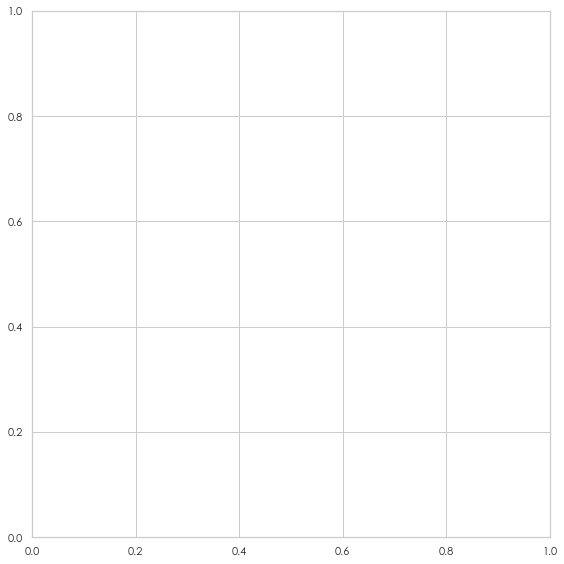

In [23]:
fig,ax_e = plt.subplots(figsize=(8,8))
confidence_ellipse(subset['pfxx'], subset['pfxz'], ax=ax_e,edgecolor =  pitch_colours[label],n_std=2,facecolor=  pitch_colours[label],alpha=0.2)